# Лабораторная работа №3 «Цифровой спектральный анализ детерминированных сигналов»



In [2]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
import scipy.io.wavfile
from scipy import signal
import scipy.io
from scipy.fft import fft, ifft
from os.path import dirname, join as pjoin
from scipy.io import wavfile


# Занятие 1. ДПФ и спектральный анализ.

## Задача 1.1.  Частотная ось ДПФ.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | 'cello1.wav' | 'cello2.wav' | 'glockenspiel.wav' | 'vibraphone1.wav' | 'clarinet.wav' | 'guitar.wav' |

| Варианты: |       7      |     8     |         9        |      10     |        11        |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | 'cello3.wav' | 'cello4.wav' | 'tuning-fork.wav' | 'vibraphone2.wav' | 'flute.wav' | 'wine-glass.wav' |




Считайте отсчеты дискретного сигнала $x[k]$, содержащегося в аудиофайле Вашего варианта. 

1) Выберите $y[k]$ — часть информативной области сигнала $x[k]$ длиной $2^{14}$ отсчетов. Если в файле меньше $2^{14}$ отсчетов, дополните ее нулями до этого числа отчетов справа.  

2) Постройте с помощью алгоритма БПФ один период ДВПФ сигнала $y[k]$. Укажите расстояние между точками по оси частот. Ось частот приведите в Гц. Определите по графику частоты основных гармонических компонент. 

3) выведите график сигнала $y[k]$ в области, где наблюдается колебание. По графику оцените период этого колебания $T_0$. Сравните частоту $f_0=1/ T_0$ с частотами основных гармоник из п.2.



43.06640625


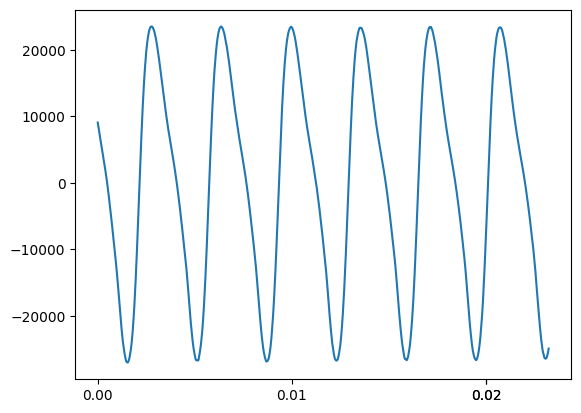

/home/lev/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


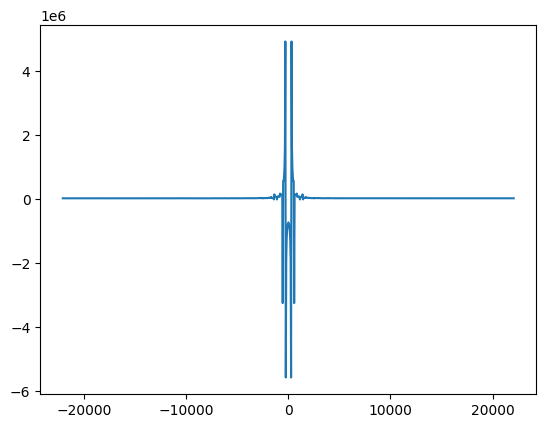

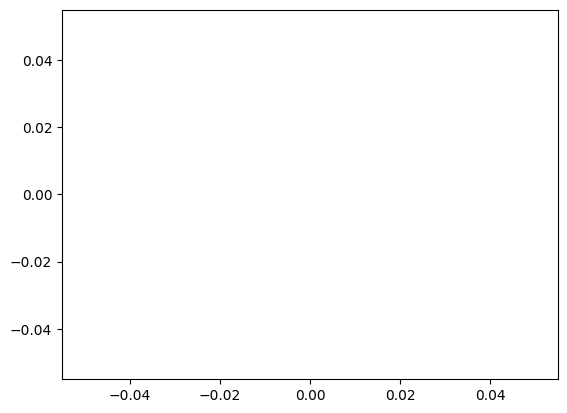

In [3]:


samplerate, array = wavfile.read("/home/lev/digital_signal_processing/data/guitar.wav")
array = array[100000:100000 + 2**10]
x_array = np.linspace(-0.5, 0.5, 2**10) * samplerate
dvpf = scipy.fft.fftshift(scipy.fft.fft(array))

print(samplerate / 2**10)
#plt.plot(array[0:2**10])

plt.xticks (np.linspace (0, 2**10 / samplerate, 4).round(2))
plt.plot (np.linspace (0, 2**10, 2**10) / samplerate, array)

plt.show()
plt.plot(x_array, dvpf)
plt.show()
plt.plot(x_array[7000:9000], dvpf[7000:9000])
plt.show()


## Задача 1.2. Задача распознавания спектральных компонент. 

Считайте последовательность $x[k]$ из файла Вашего варианта (`variant_Nv_ex_1_2.npy`, где `Nv` — номер варианта). Известно, что ее аналитическая запись  имеет вид 

$$x[k]=\sum\limits_{m=1}^{M}{{{A}_{m}}}\sin (2\pi \frac{m}{N}k+{{\varphi }_{m}}),\quad k=0,\ 1,\ 2,\ \ldots ,\ N-1,$$


где $N$ — длина последовательности, $M<(N-1)/2$, относительные частоты гармонических компонент совпадают с бинами ДПФ. Определите число компонент,  их амплитуды ${{A}_{m}}$ и фазы ${{\varphi }_{m}}$, $m=1,\dots, M$.


<class 'numpy.complex128'>


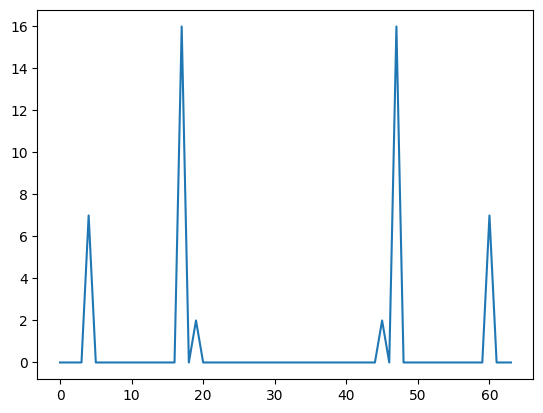

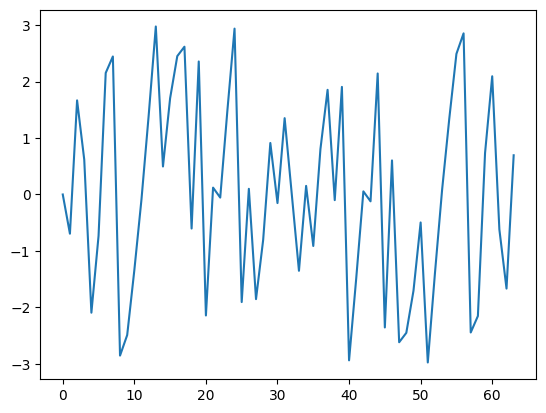

In [4]:
Nv=11
x = np.load('../data/variant_%i_ex_1_2.npy' %Nv )
dvpf = scipy.fft.fftshift(scipy.fft.fft(x)) / x.shape[0]
ampl = np.abs(2 * dvpf)
print(type(dvpf[0]))
phi = np.angle(dvpf)
plt.plot(ampl)
plt.show()
plt.plot(phi)
plt.show()

# Занятие 2. Окна в спектральном анализе.

## Задача 2.1. Исследование характеристик различных окон.
Рассмотрите следующие окна для ДПФ длиной в $N=20+2N_v$, где $N_v $ — номер Вашего варианта:

1) прямоугольное (`boxcar`),

2) Бартлетта (`bartlett`),

3) Ханна (`hann`),

4) Хэмминга (`hamming`),

5) Блэкмана (`blackman`),

6) окно с плоской вершиной (`flattop`).

Постройте графики для окон во временной области, амплитудно-частотной характеристики окон в линейном масштабе и в дБ. По графикам для каждого окна оцените следующие параметры:

* ширину $\Delta \nu$ главного лепестка на уровне половинной мощности,

* максимальный уровень боковых лепестков относительно главного в дБ,

* асимптотическую скорость спада боковых лепестков в дБ/октава. 

Составьте таблицу с результатами. 


In [5]:
import scipy.integrate as integrate # импорт модуля численного интегрирования

def integrate_function(t, func, f, tau, real_part=True):
    # Подынтегральное выражение для использованиия в функции integrate.quad
    # t - время
    # func - функция, задающая импульс
    # f - частота
    # tau - константа, используемая для задания длительности импульса
    if real_part:
        return func(t, tau)*np.cos(-2*np.pi*f*t)  # действительная часть интеграла
    else:
        return func(t, tau)*np.sin(-2*np.pi*f*t)  # мнимая часть интеграла
def fourier_transform(signal, f_band, tau, t1, t2, res_type='abs'):
    if res_type=="abs":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return abs(Re+1j*Im)
    elif res_type=="Re":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        return Re
    elif res_type=="Im":
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return Im

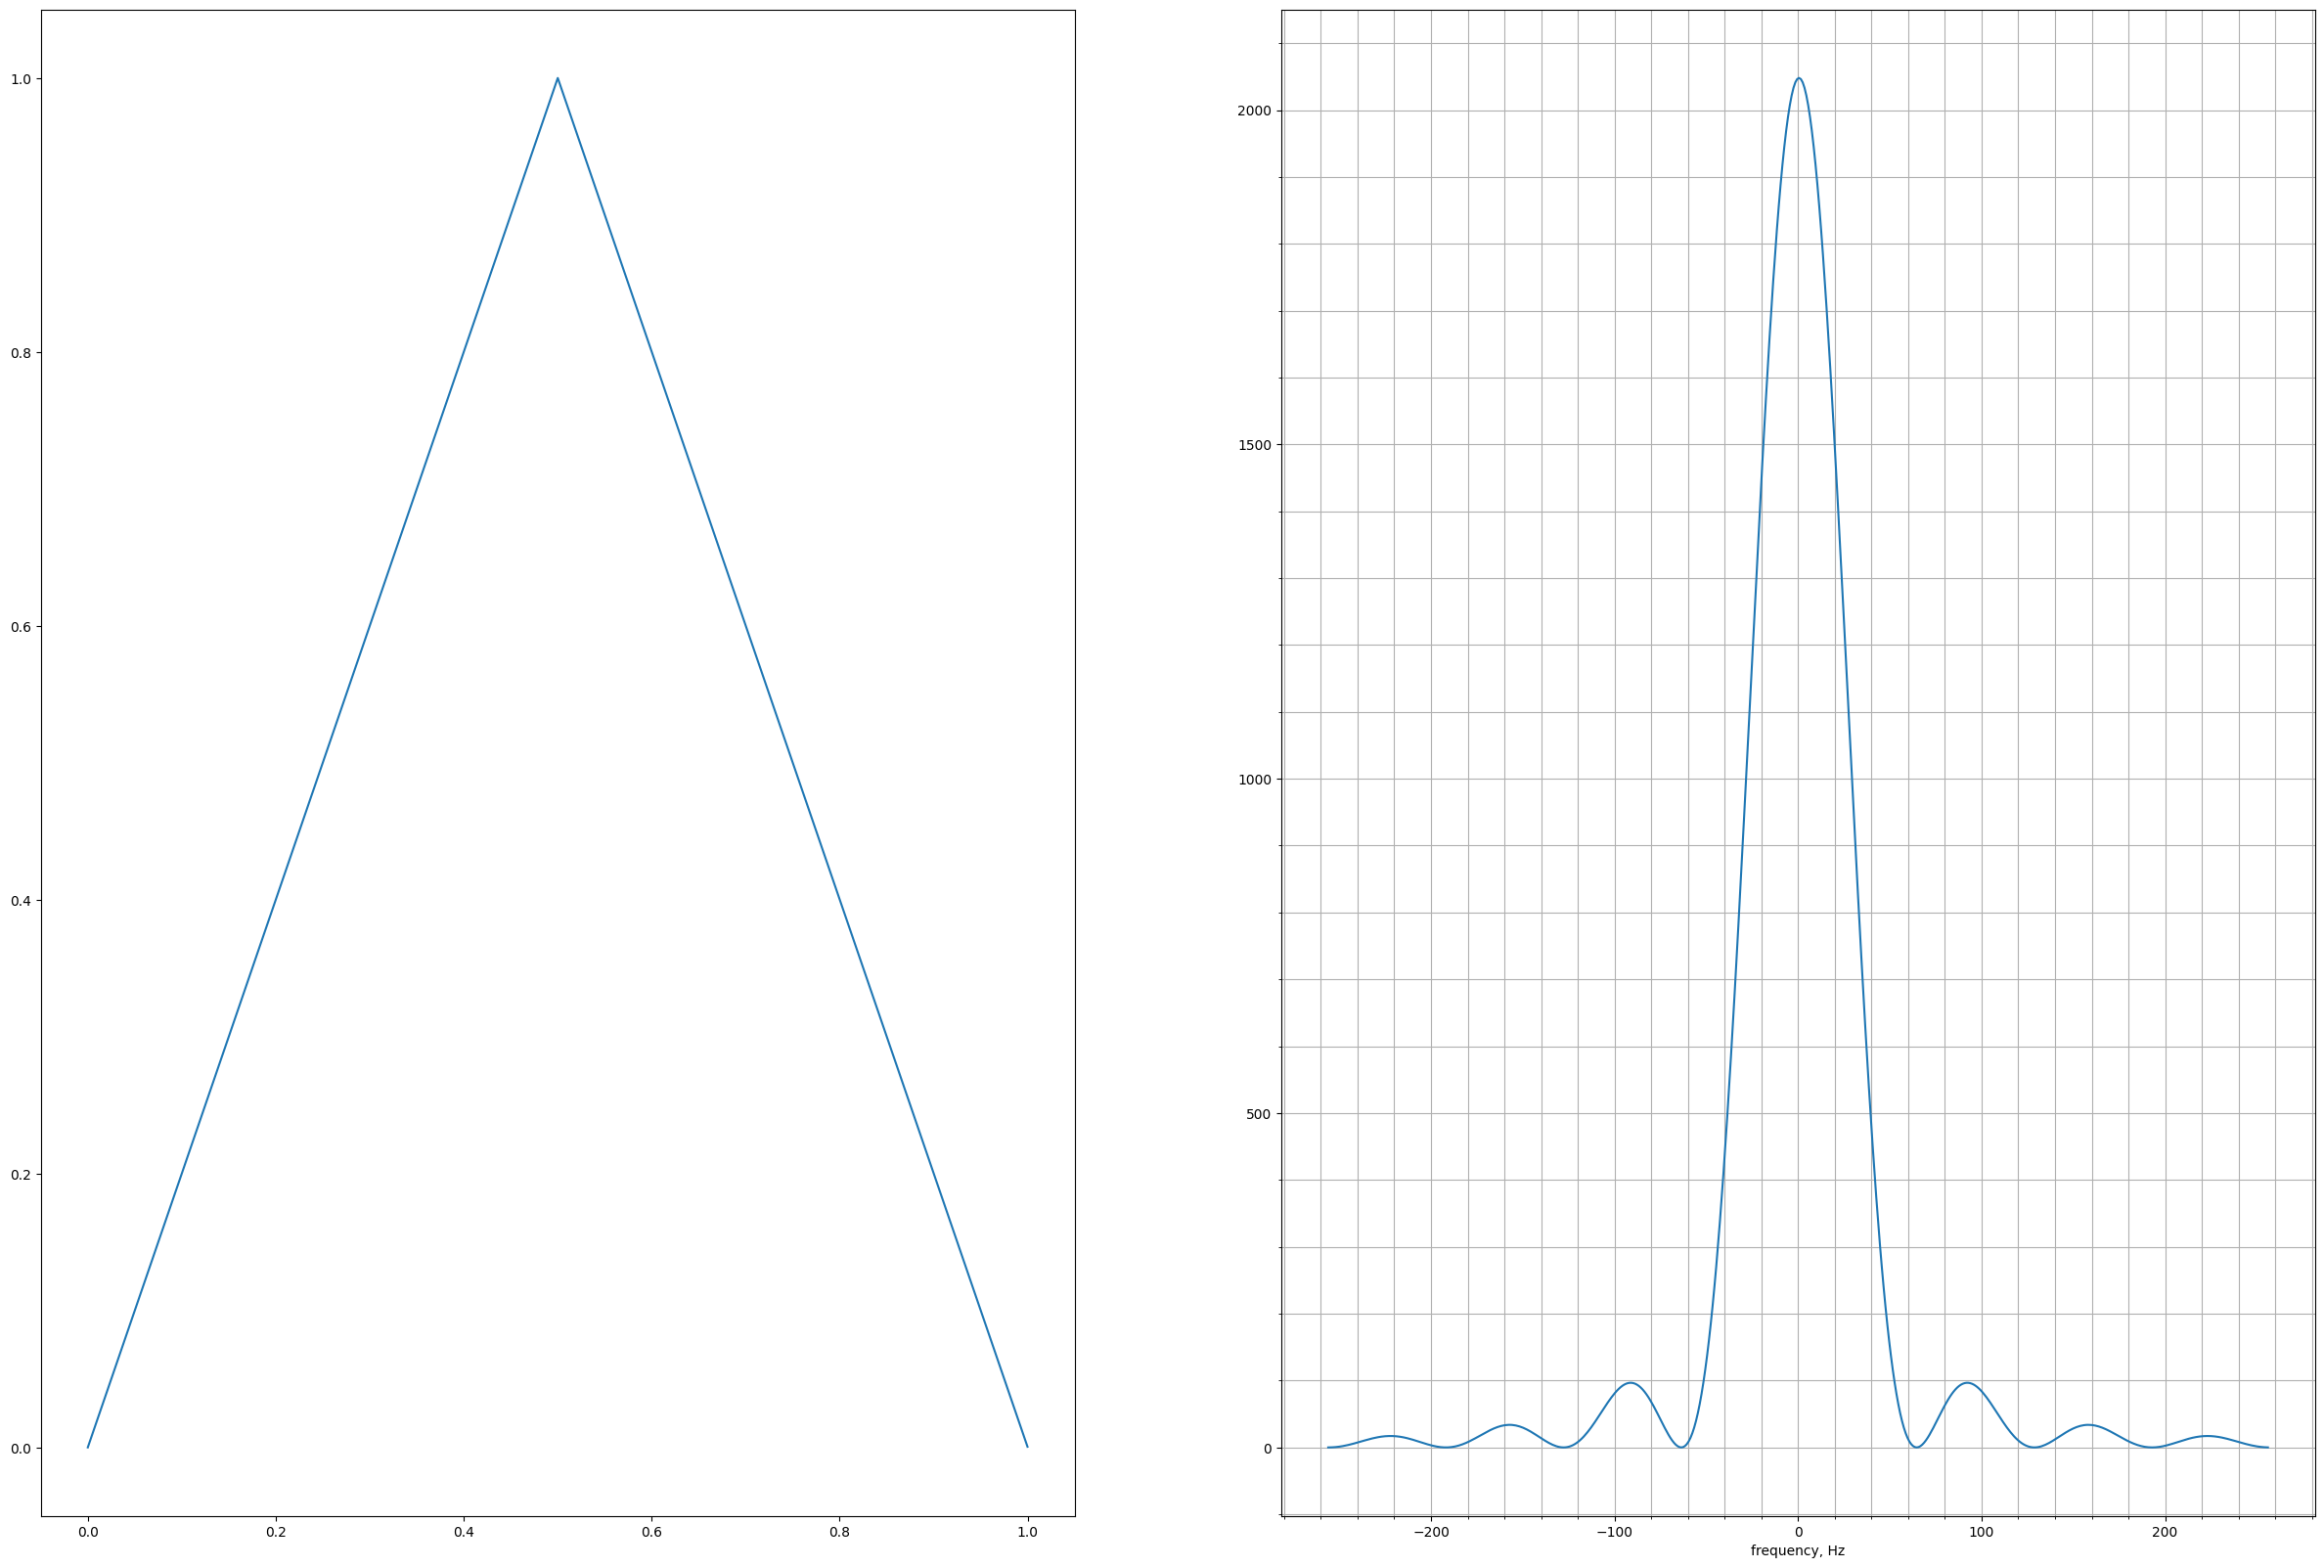

In [6]:

 #число точек в диапазоне, в которых вычисляется X(f)
flatc = [0.21557895, 0.41663158, 0.277263158, 0.083578947, 0.006947368]
def boxcar (N, t, a = 1):
    if t < N and t >= 0:
        return a
    else:
        return 0
    
def bartlett (N, t, a = 1):
    if t < N and t >= 0:
        return a * (1 - 2/N * np.abs (t - N // 2))
    else:
        return 0

def hann (N, t, a = 1):
    if t < N and t >= 0:
        return a/2 * (1 - np.cos (2 * np.pi * t / N))
    else:
        return 0

def hamming (N, t, a = 1):
    if t < N and t >= 0:
        return a * (0.54 - 0.46 * np.cos (2 * np.pi * t / N))
    else:
        return 0
    
def trapecia(N, t, k, a = 1):
    const = k / 3
    c = k
    if 0 < t and t < N / 3:
        return k * t / N
    elif N / 3 < t < 2 * N / 3:
        return const
    elif 2 * N / 3 < t < N:
        return c - k * t / N
    else:
        return 0

def blackman (N, t, a = 1):
    if t < N and t >= 0:
        return a * (0.42 - 0.5 * np.cos (2 * np.pi * t / N) + 0.08 * np.cos (4 * np.pi * t / N))
    else:
        return 0

def cirle(N, t, a=1):
    if 0 < t and t < N:
        return (1 / 4 - (t / N - 0.5)**2)**(1/2)
    else:
        return 0

def sinus(N, t, a=1):
    if 0 < t and t < N:
        return np.sin(t / N * np.pi - np.pi / 2)
    else:
        return 0

def flattop (N, t, a = 1):
    if t < N and t >= 0:
        s = 0
        for i in range (0, 5):
            s += (-1) ** i * flatc[i] * np.cos (2 * np.pi * i * t / N)
        return s * a
    else:
        return 0
    
    
def drawFunc (N, windowfunc, t, p1 = None, p2 = None, p3 = 1):
    Nspectrum = N * 32
    tarr = np.linspace (0, Nspectrum, Nspectrum, dtype=np.int32)
    xarray = np.zeros(Nspectrum)
    spec = np.zeros(Nspectrum)
    discr_step = t / (32 * N)
    discr_freq = 1 / discr_step
    if p2 != None:
        for i in range (Nspectrum):
            xarray[i] = windowfunc (N, tarr[i], p1, p2)
    elif p1 != None:
        for i in range (Nspectrum):
            xarray[i] = windowfunc (N, tarr[i], p1)
    else:
        for i in range (Nspectrum):
            xarray[i] = windowfunc (N, tarr[i])

    spec = scipy.fft.fft (xarray)
    specmax = np.absolute(spec[0])
    spec = np.absolute (scipy.fft.fftshift (spec))

    fig, ax = plt.subplots(1, 2, figsize = (30, 20))

    ax[0].plot ((t / N) * np.linspace (0, N, N), xarray[0:N])
    ax[1].plot (discr_freq * np.linspace (-0.5 / 256, 0.5/ 256, Nspectrum // 256), spec[Nspectrum // 512 * 255: Nspectrum // 512 * 257])
    ax[1].set_xlabel("frequency, Hz")
    ax[1].grid (axis='both', which='both', visible=True)
    ax[1].minorticks_on ()
    # ax[2].plot (np.linspace (-0.5, 0.5, Nspectrum), 20 * np.log10 (spec / specmax))
    # ax[2].set_ylim (-100,5)
    # ax[2].grid (axis='both', which='both', visible=True)
    # ax[2].minorticks_on ()

#drawFunc(4096, sinus, 10**(-6))
# drawFunc (4096, boxcar, 1)
drawFunc (4096, bartlett, 200 * (10**-6), 3)
# drawFunc (4096, hann, 1)
# drawFunc (4096, hamming, 1)
# drawFunc (4096, blackman, 1)
# drawFunc (4096, flattop, 1)
# plt.figure(figsize=[6, 4])
# plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
# plt.xlabel("Время t, мкс")
# plt.ylabel("$x(t)$, В")
# plt.title("Сигнал")
# plt.tight_layout() 
# plt.grid()


# plt.figure(figsize=[6, 4])
# plt.plot(f_band/1e3, spec)a
# plt.xlabel("Частота f, кГц")
# plt.ylabel("$|X(f)|$,  мкВ / Гц")
# plt.title("Спектр")
# plt.tight_layout() 
# plt.grid()

# plt.figure(figsize=[6, 4])
# plt.plot (np.linspace (-0.5, 0.5, N), 20 * np.log10 (spec / specmax))
# plt.grid (axis='both', which='both', visible=True)
# plt.minorticks_on ()



/tmp/ipykernel_303/3853082110.py:4: RuntimeWarning: invalid value encountered in divide
  y = 2 * np.sin(x * np.pi / x0) / x - 1/(x - x0) * np.sin((x - x0) / x0 * np.pi) - 1/(x + x0) * np.sin((x + x0) / x0 * np.pi) - 1/(x - x0) * np.sin(2 * (x - x0) / x0 * np.pi)
/tmp/ipykernel_303/3853082110.py:4: RuntimeWarning: divide by zero encountered in divide
  y = 2 * np.sin(x * np.pi / x0) / x - 1/(x - x0) * np.sin((x - x0) / x0 * np.pi) - 1/(x + x0) * np.sin((x + x0) / x0 * np.pi) - 1/(x - x0) * np.sin(2 * (x - x0) / x0 * np.pi)
/tmp/ipykernel_303/3853082110.py:4: RuntimeWarning: invalid value encountered in multiply
  y = 2 * np.sin(x * np.pi / x0) / x - 1/(x - x0) * np.sin((x - x0) / x0 * np.pi) - 1/(x + x0) * np.sin((x + x0) / x0 * np.pi) - 1/(x - x0) * np.sin(2 * (x - x0) / x0 * np.pi)


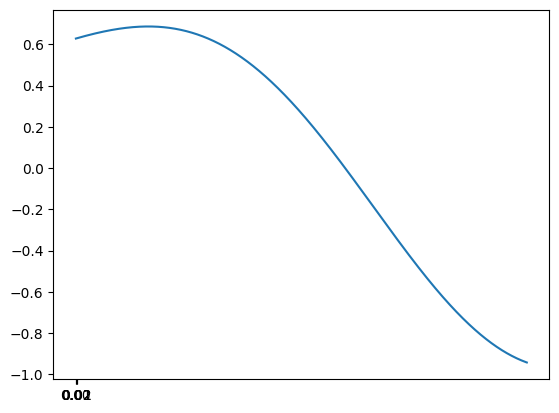

In [7]:
plt.xticks (np.linspace (0, 2**10 / samplerate, 4).round(2))
x = np.linspace(0, 10, 10000)
x0 = 10
y = 2 * np.sin(x * np.pi / x0) / x - 1/(x - x0) * np.sin((x - x0) / x0 * np.pi) - 1/(x + x0) * np.sin((x + x0) / x0 * np.pi) - 1/(x - x0) * np.sin(2 * (x - x0) / x0 * np.pi)
plt.plot(x, y)

## Задача 2.2. Окно Кайзера.
Повторите вычисления задачи 2.1 для окна Кайзера с параметром $\beta =0;\ \ 5;\ \ 6;\ \ 8,6$. Сравните полученные результаты с предыдущей задачей. 


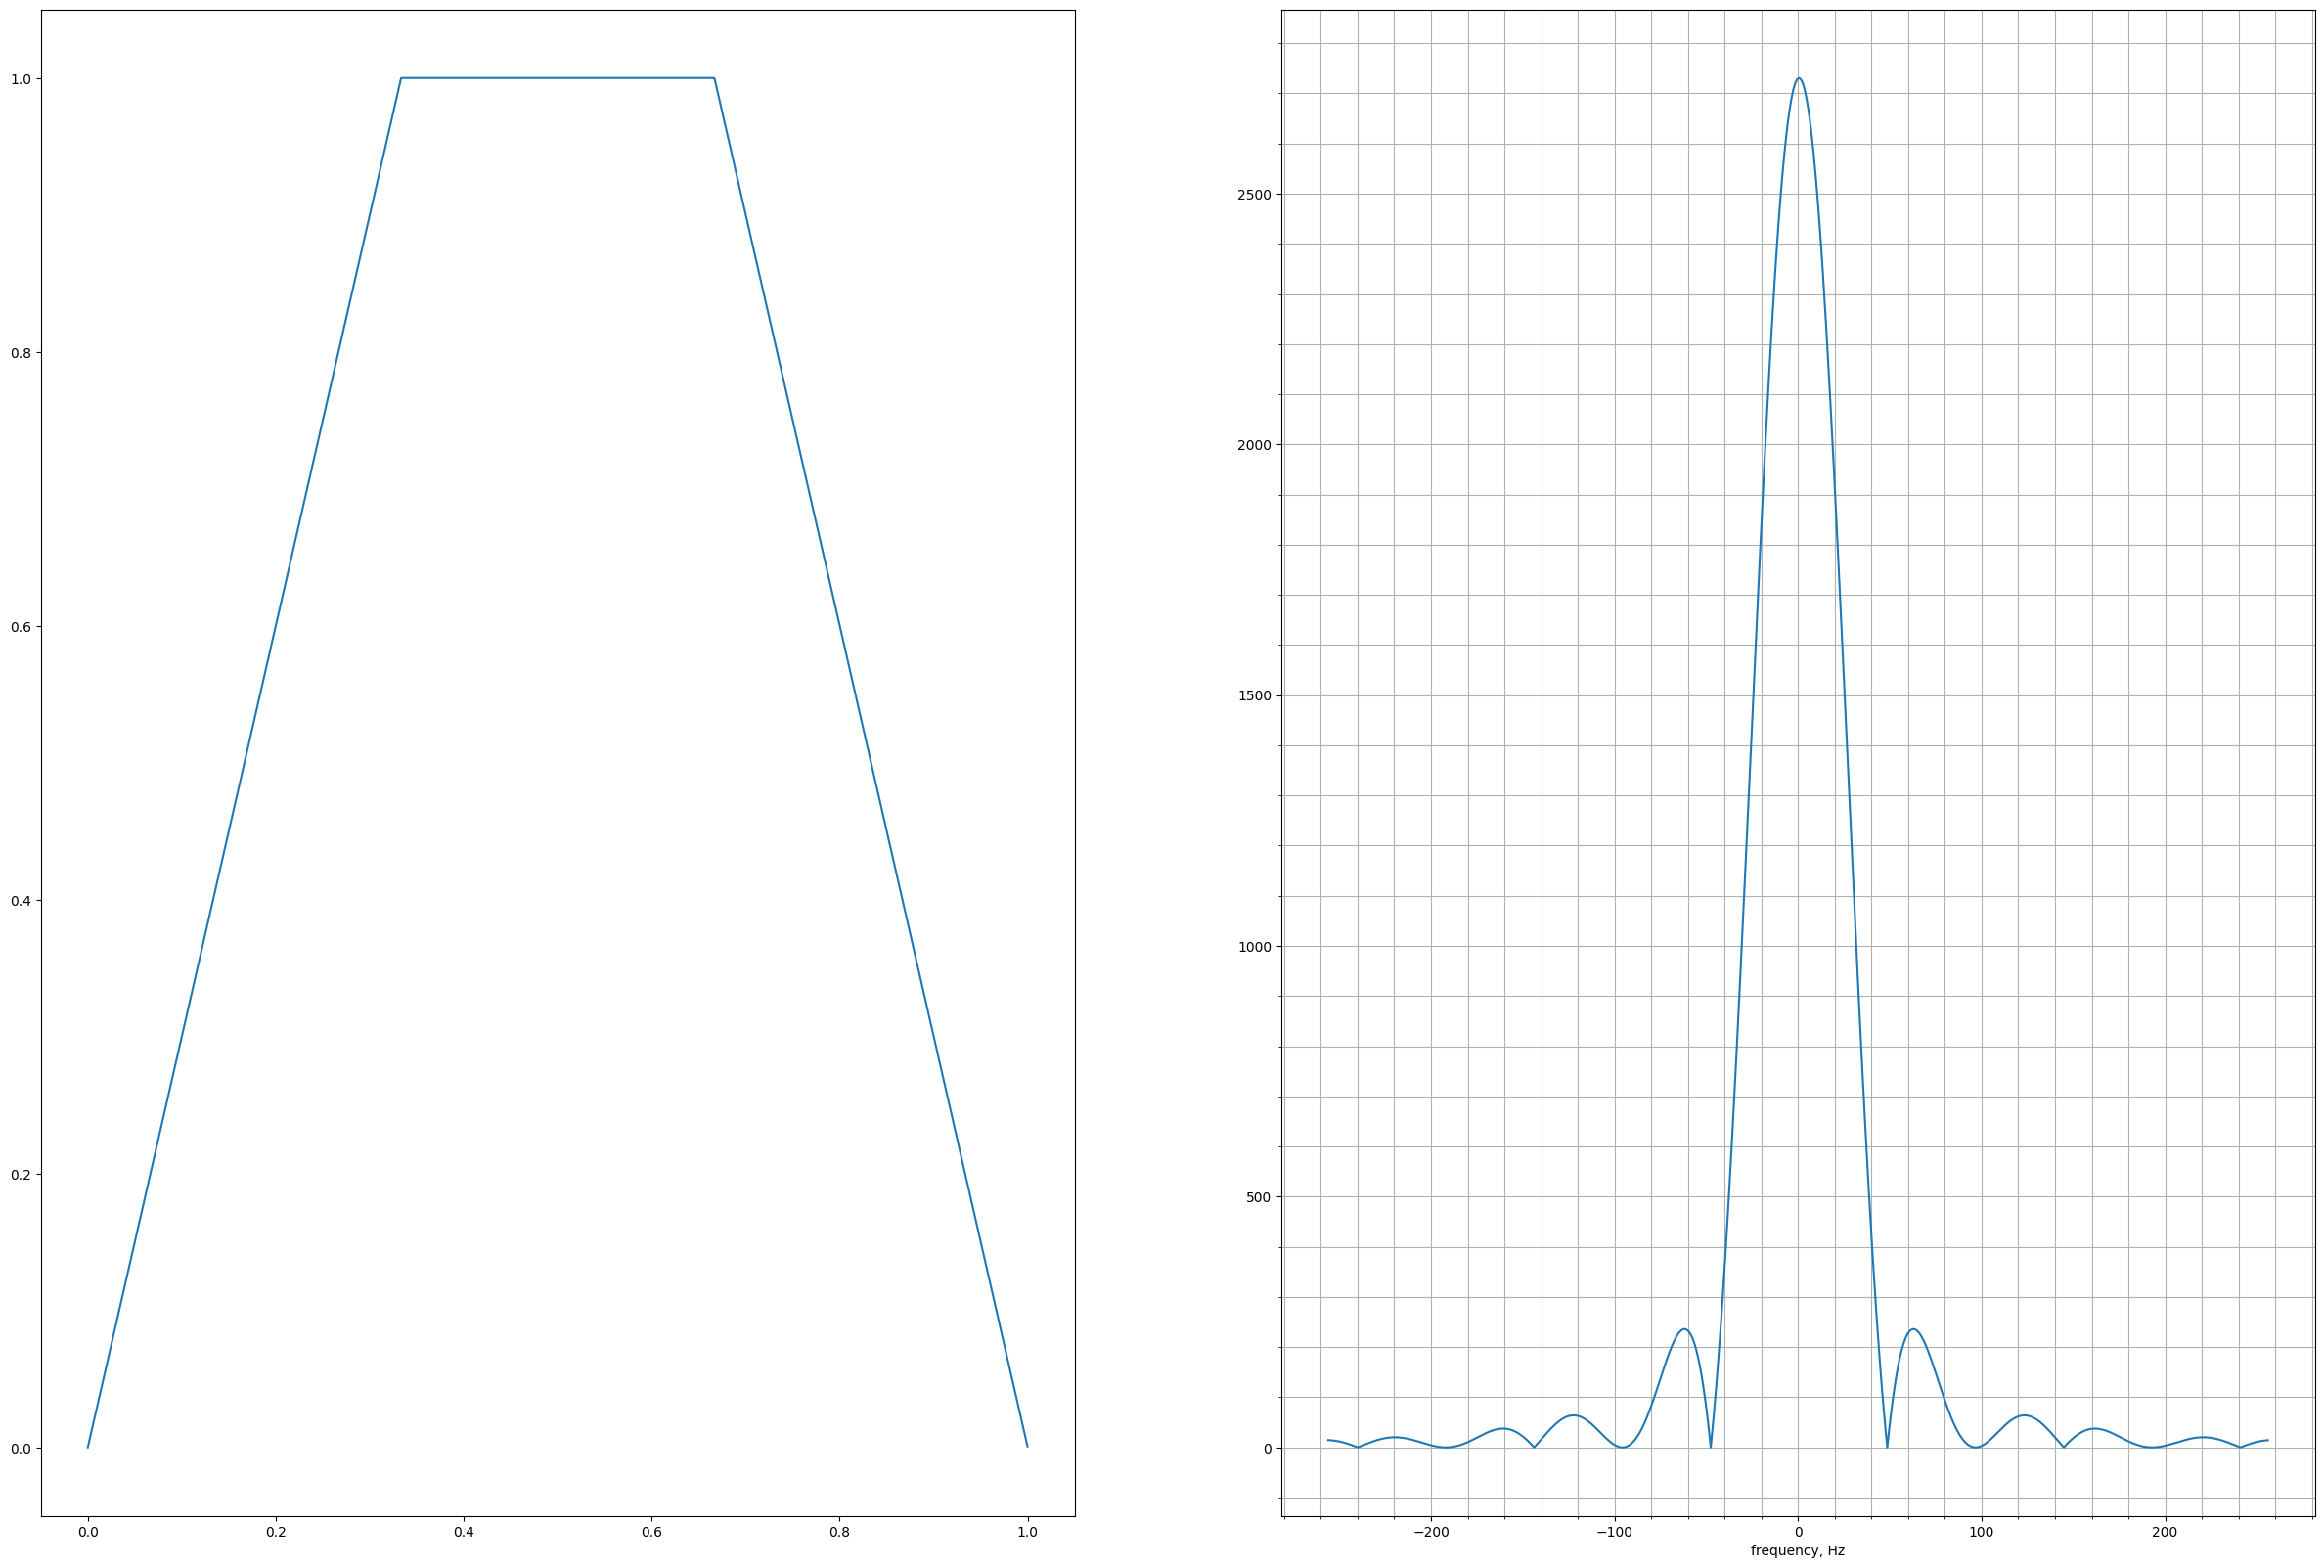

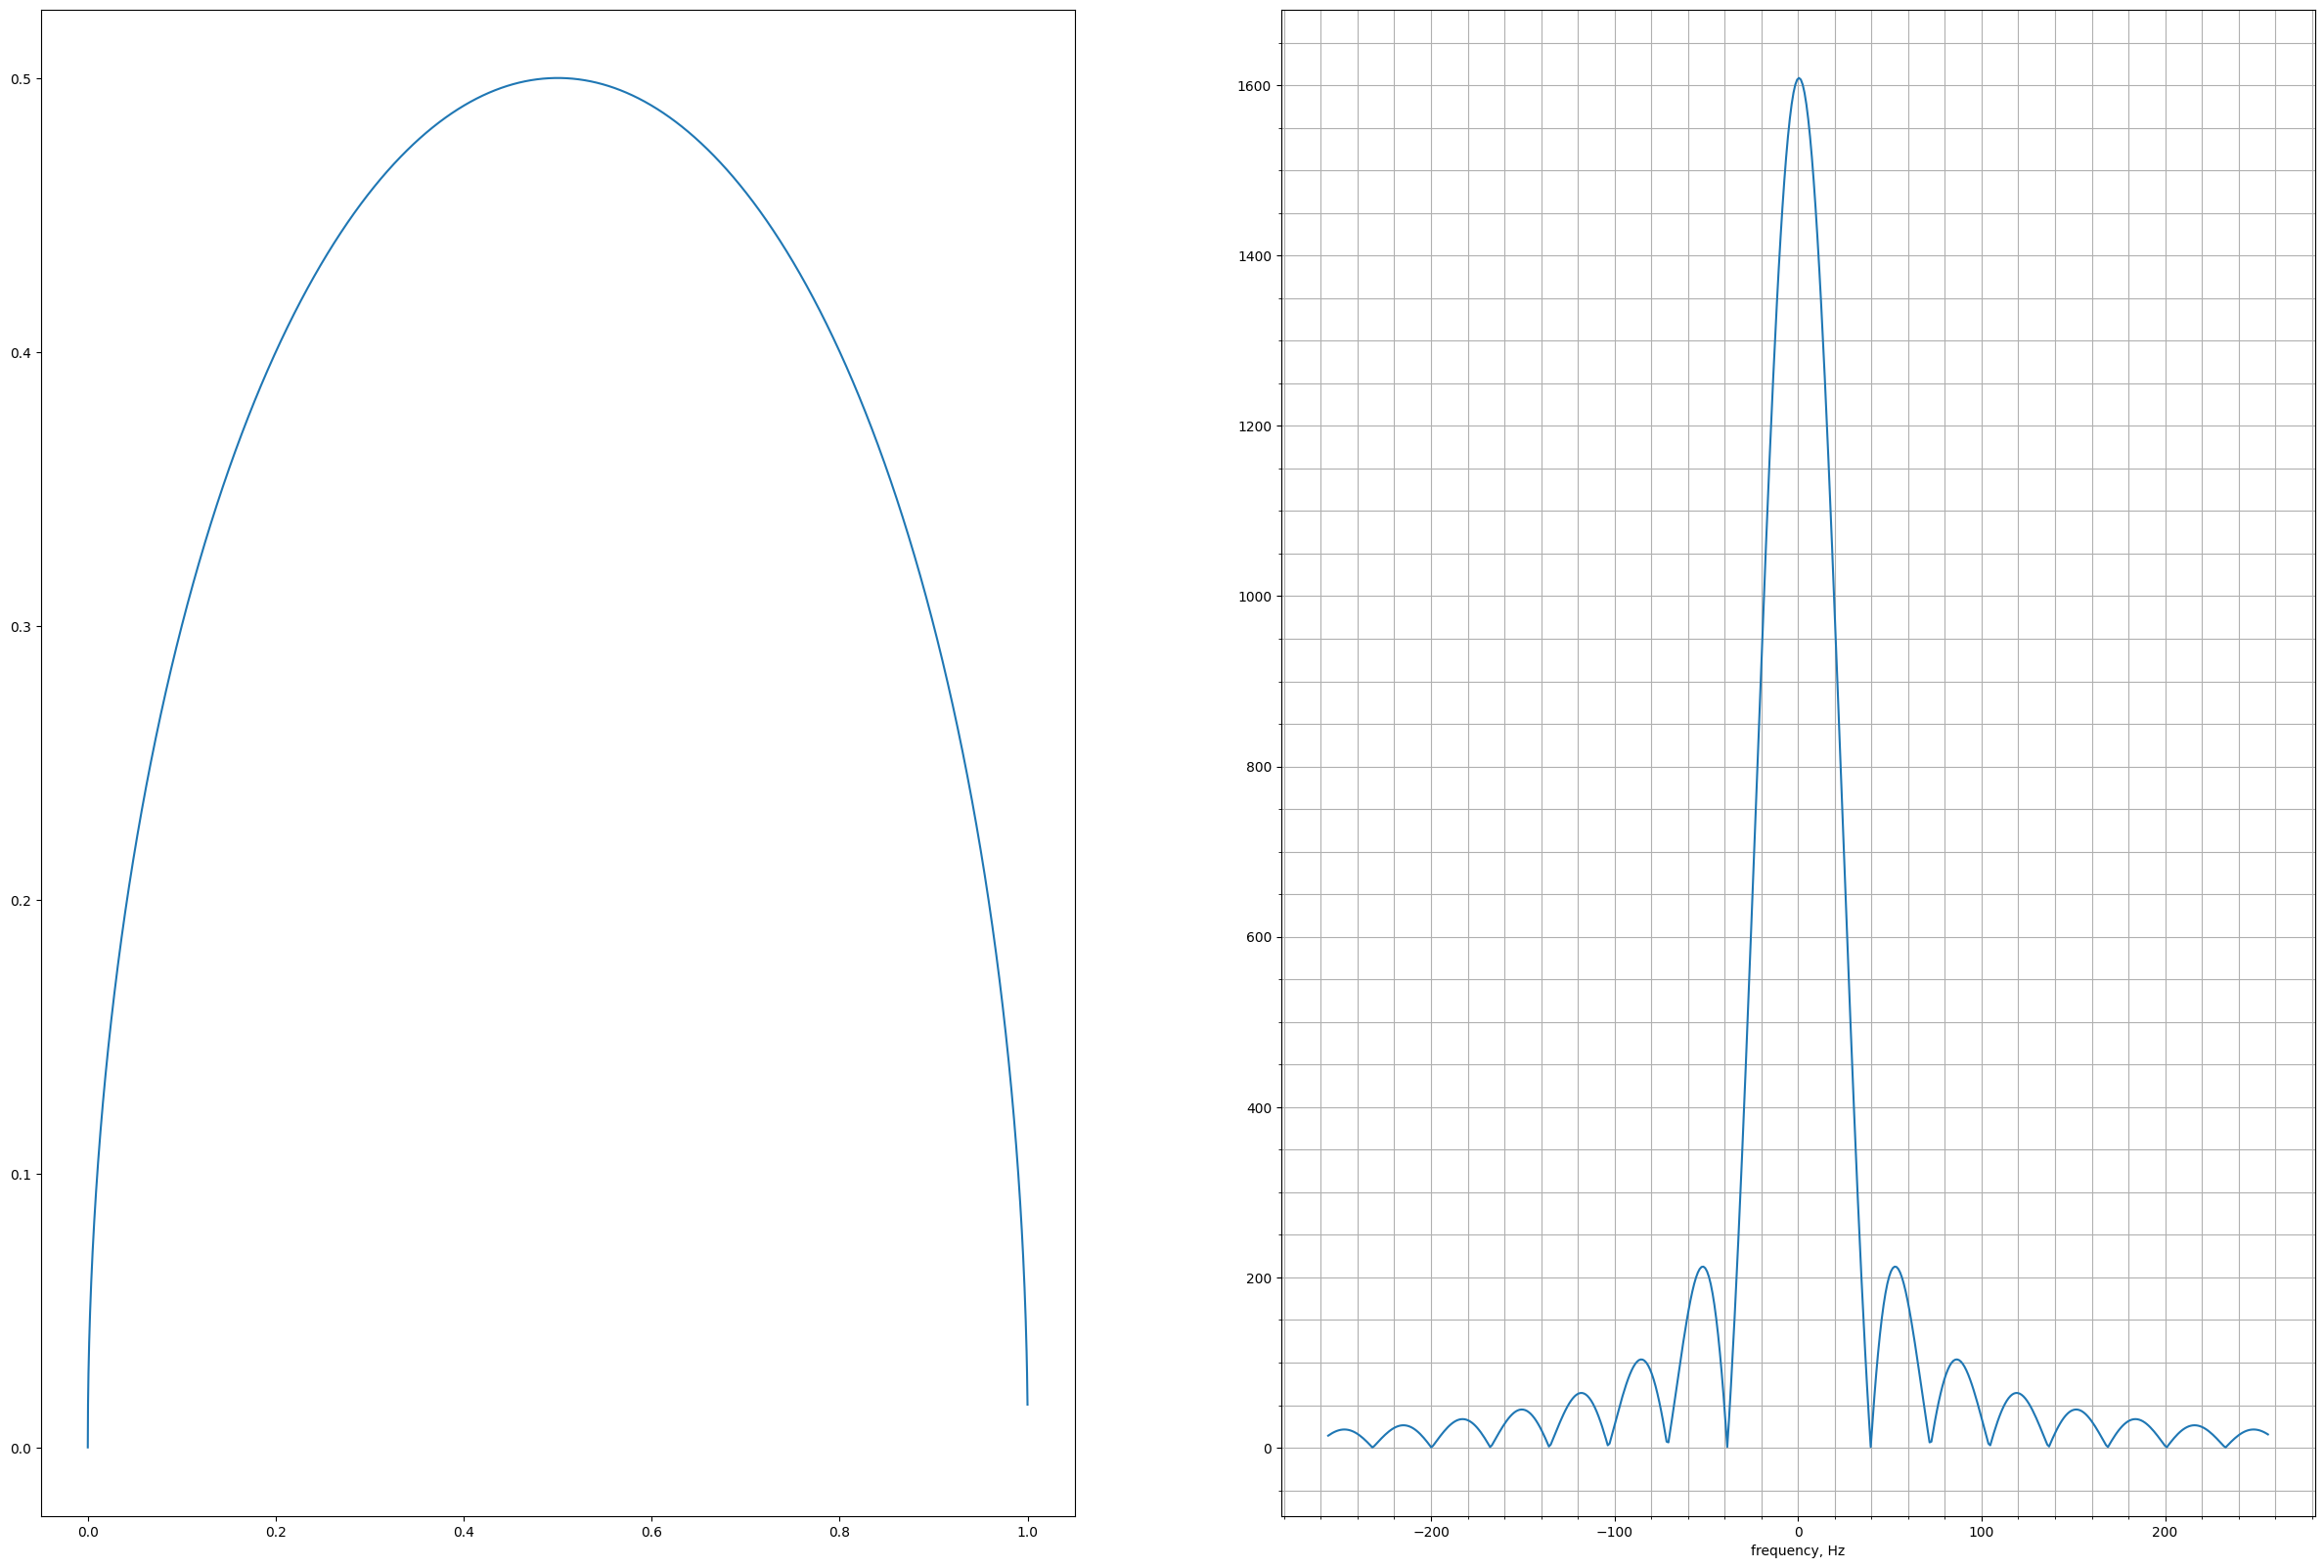

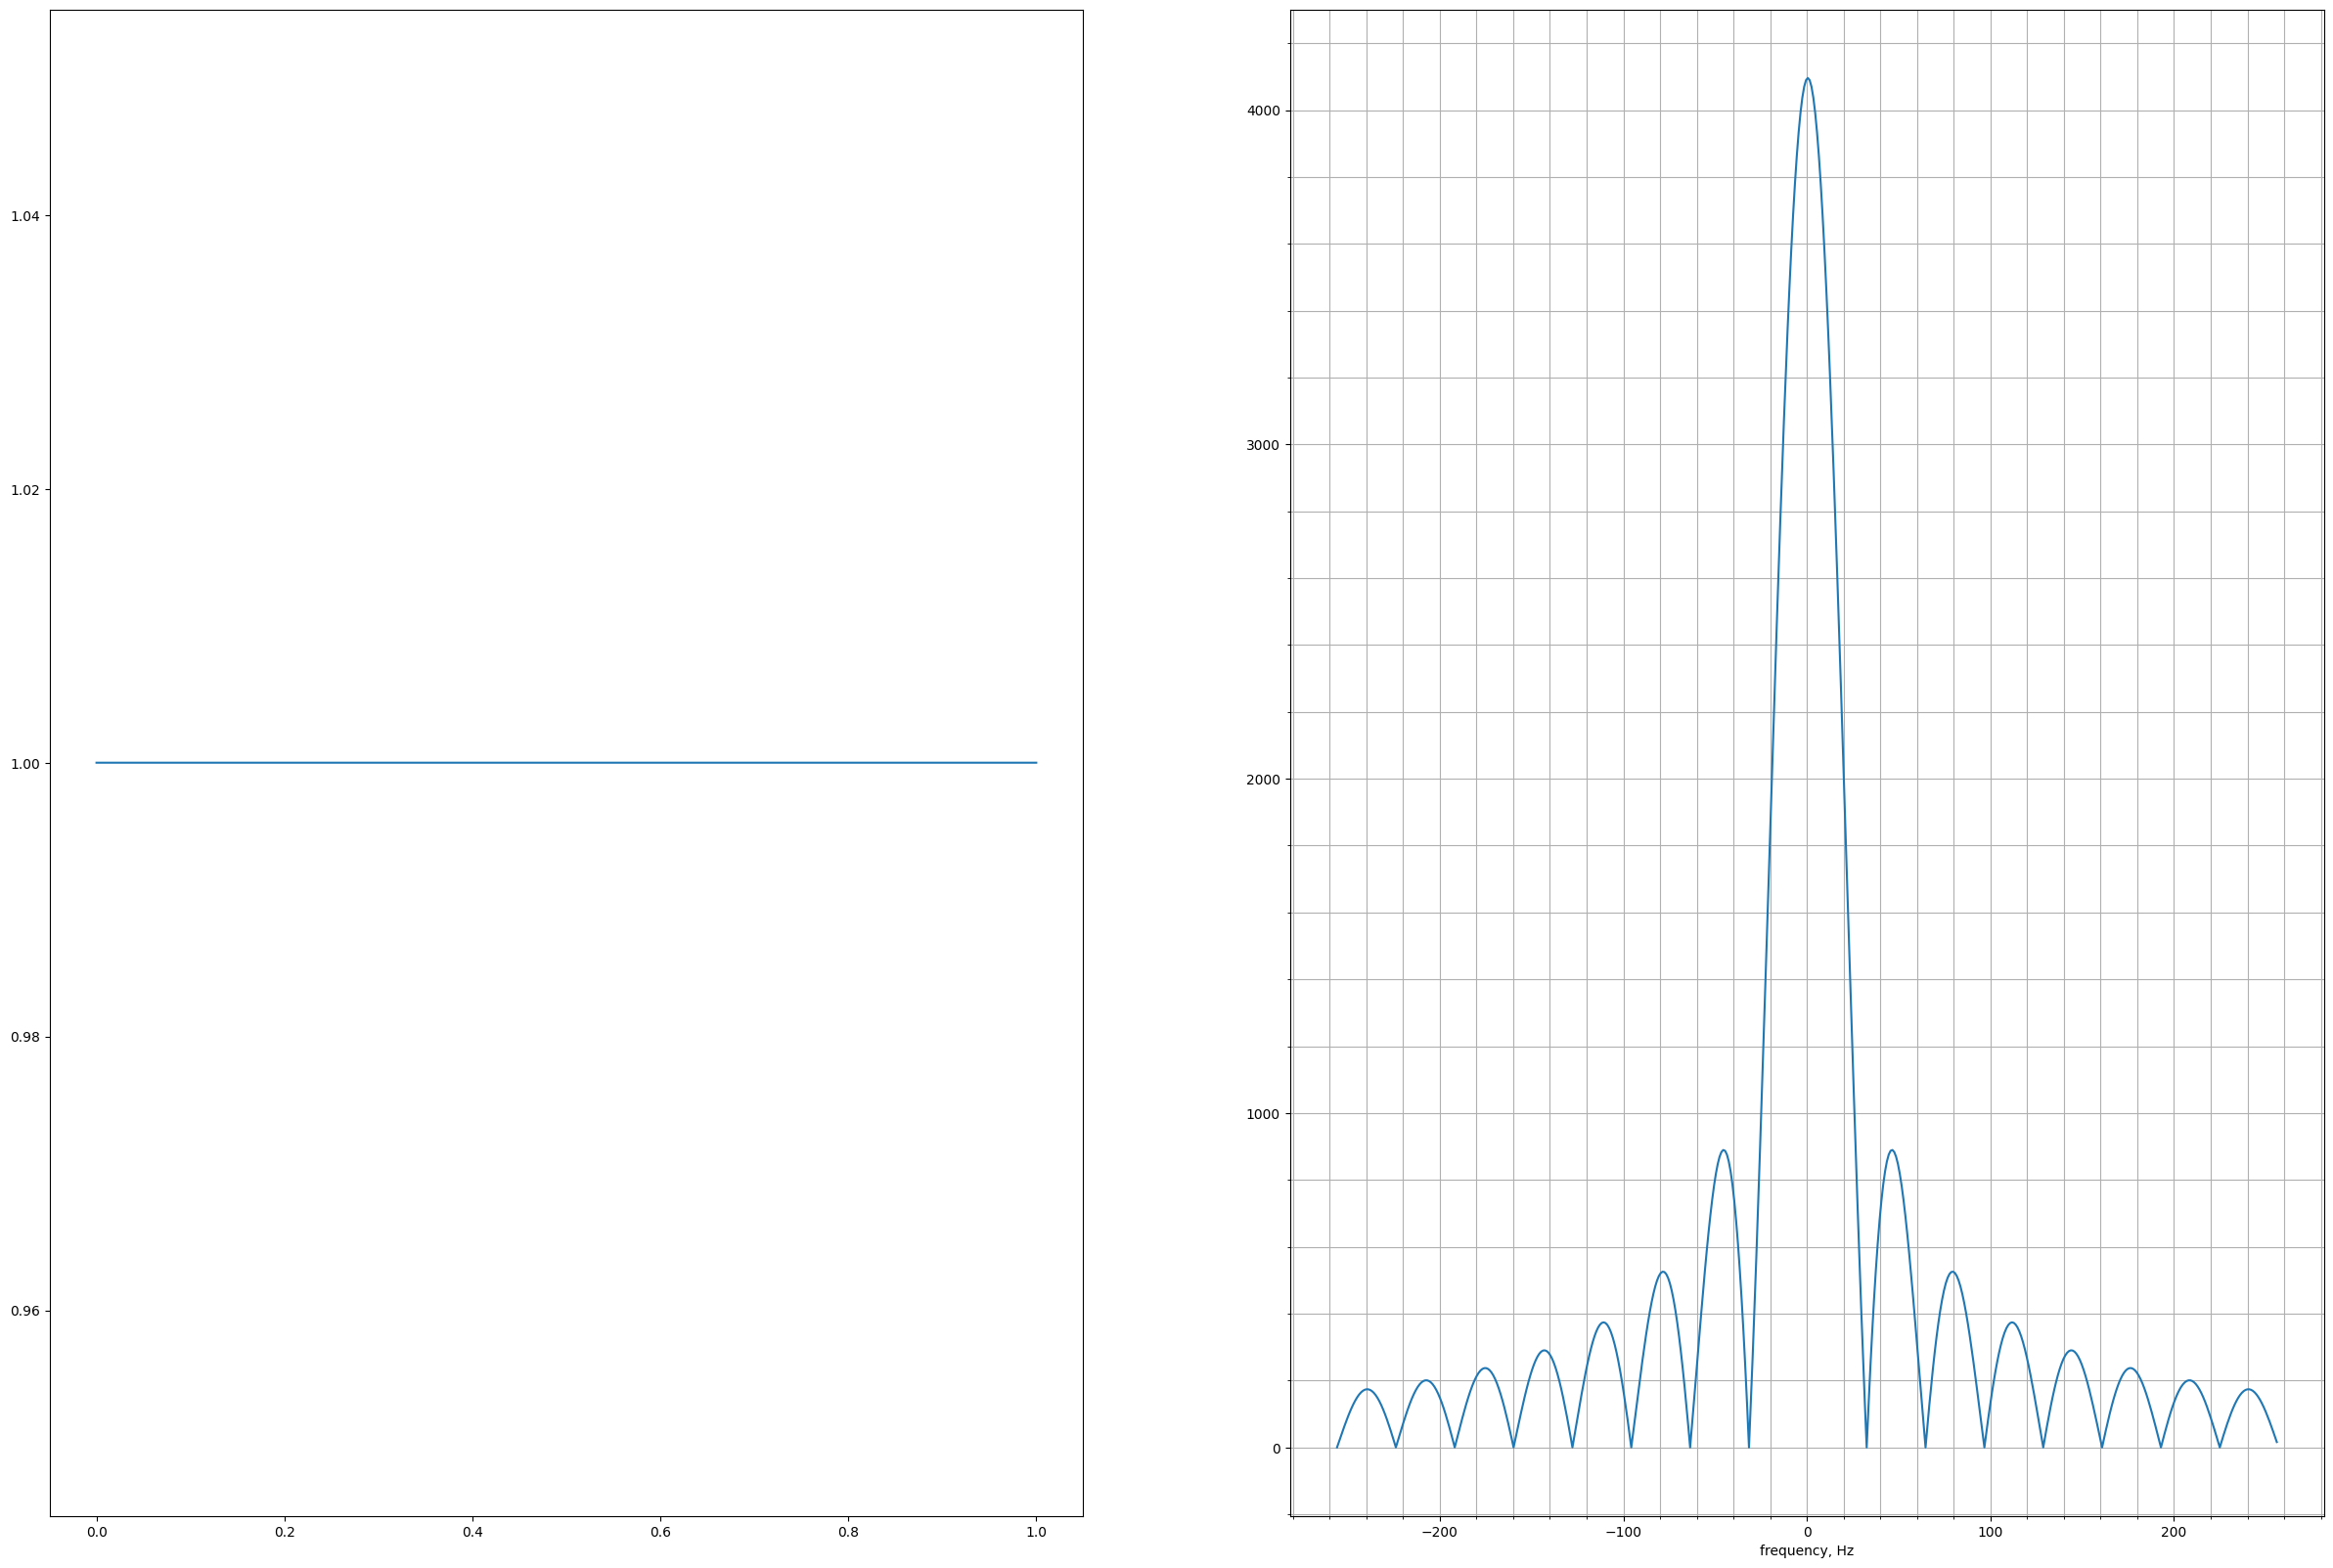

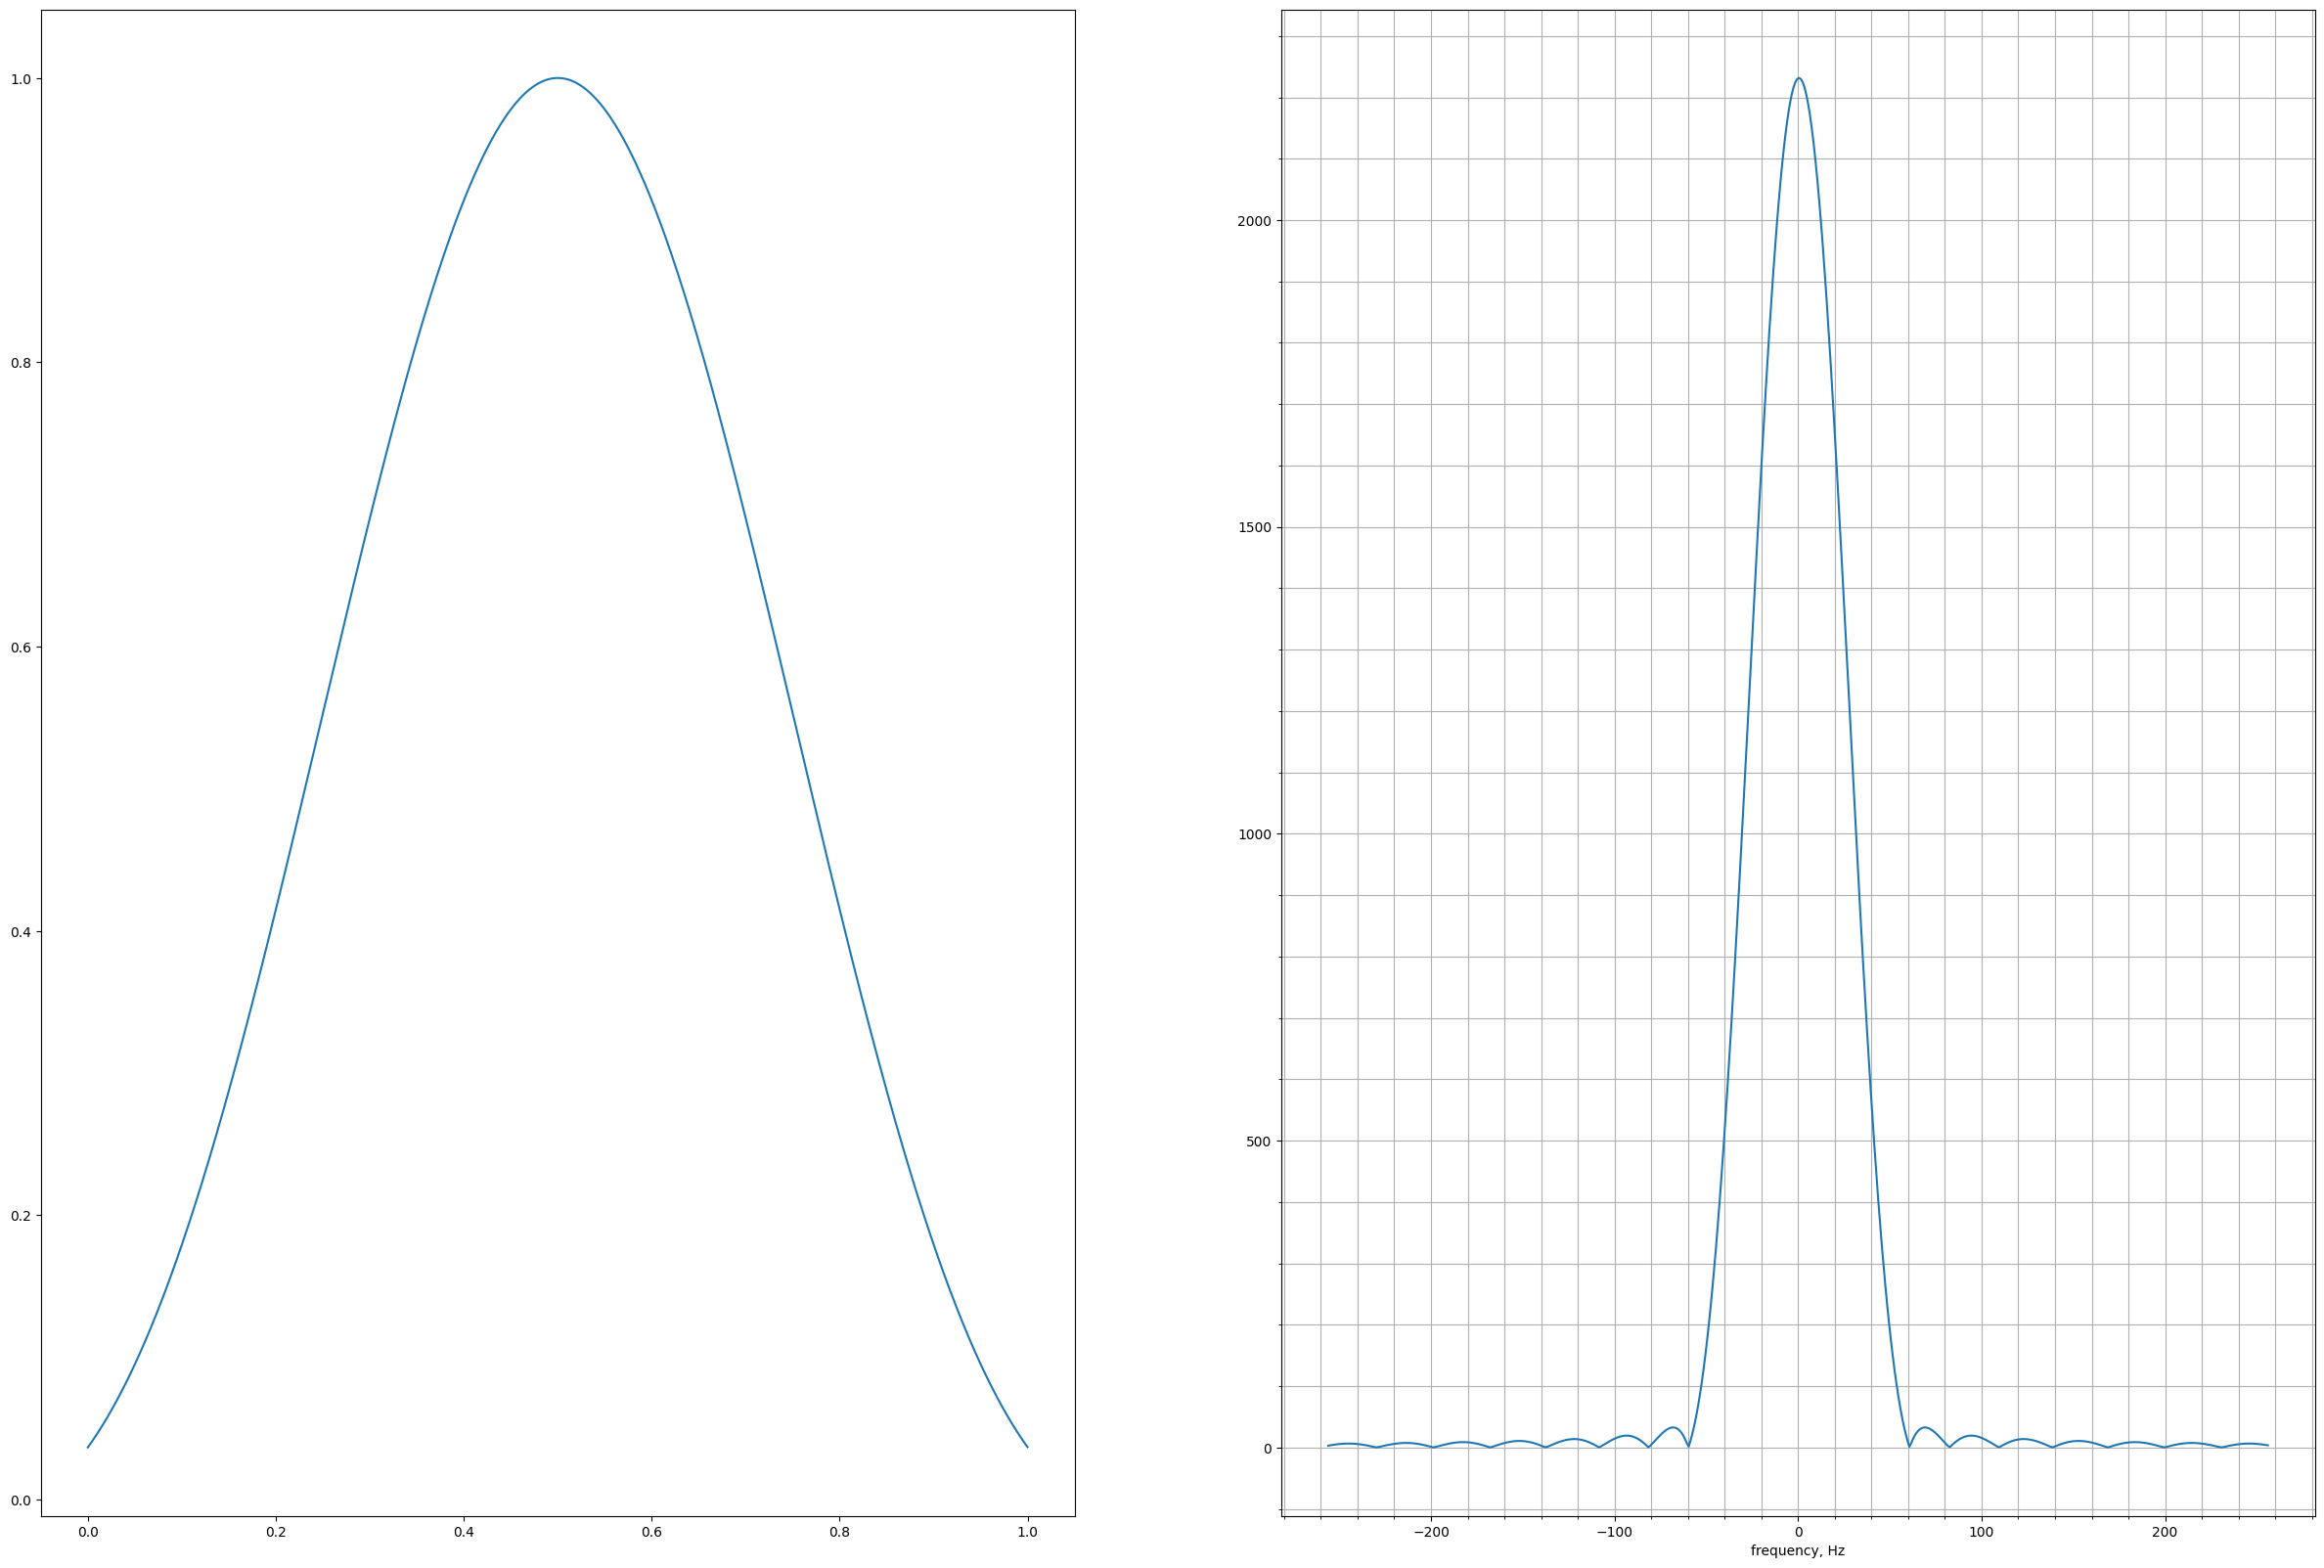

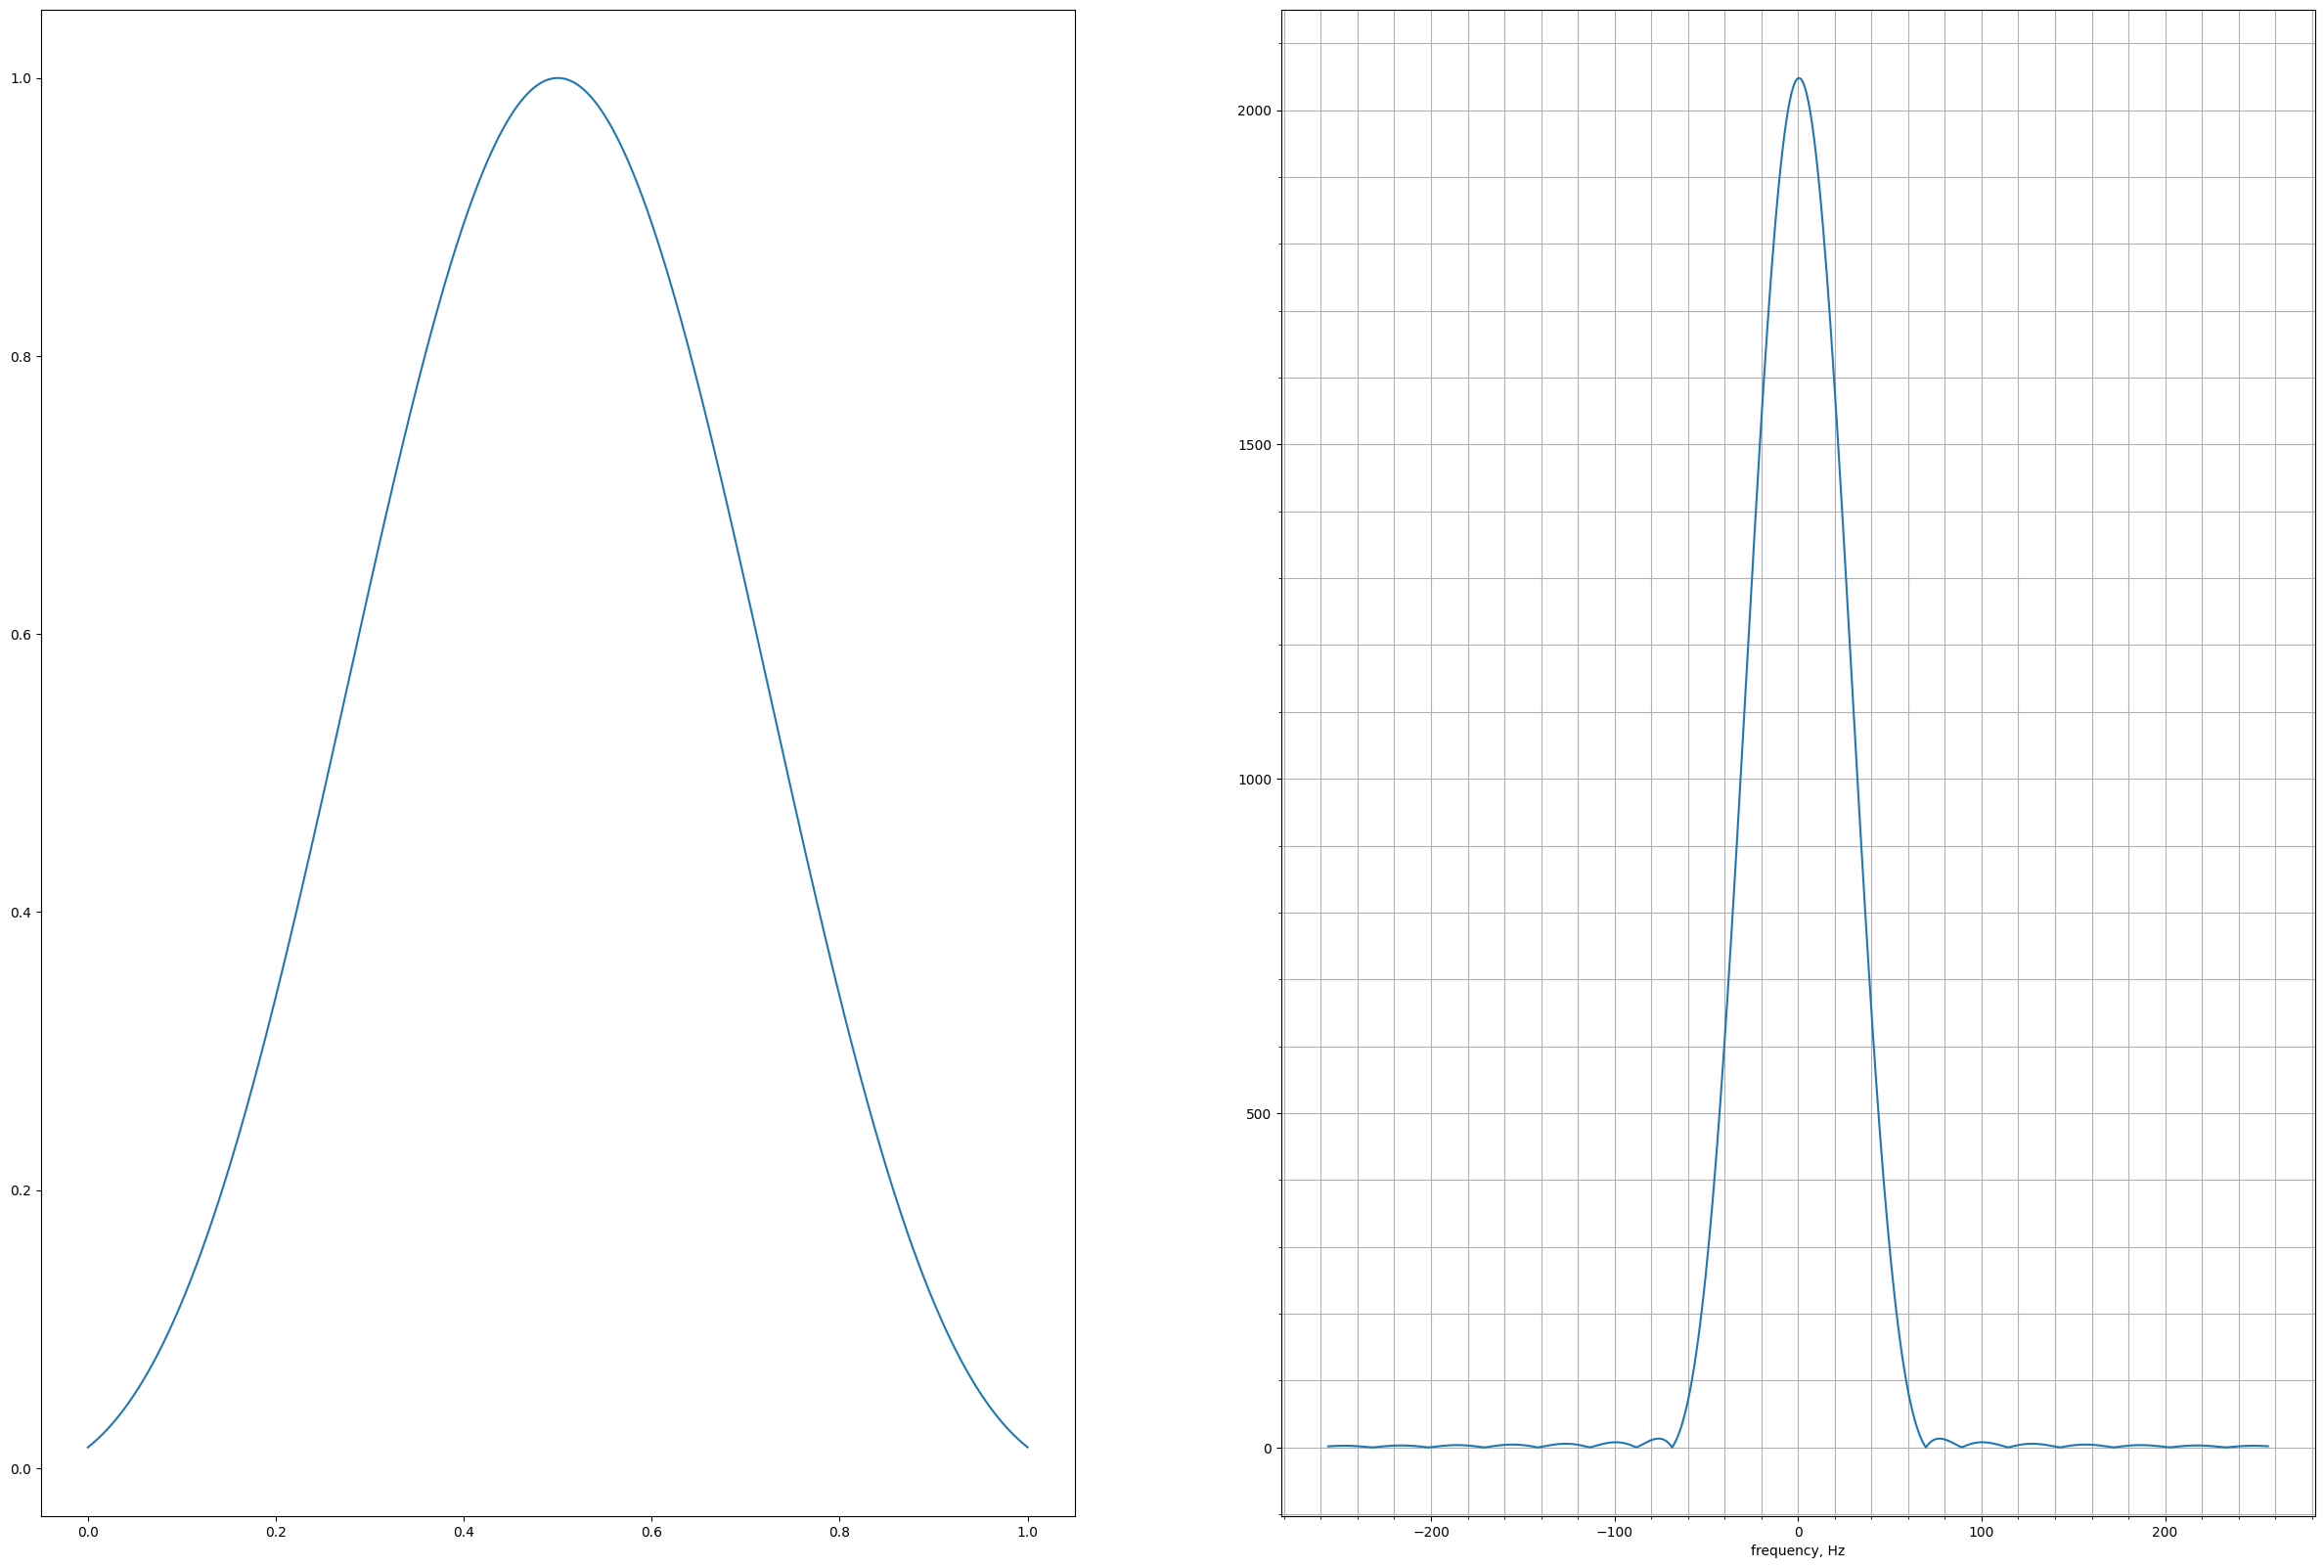

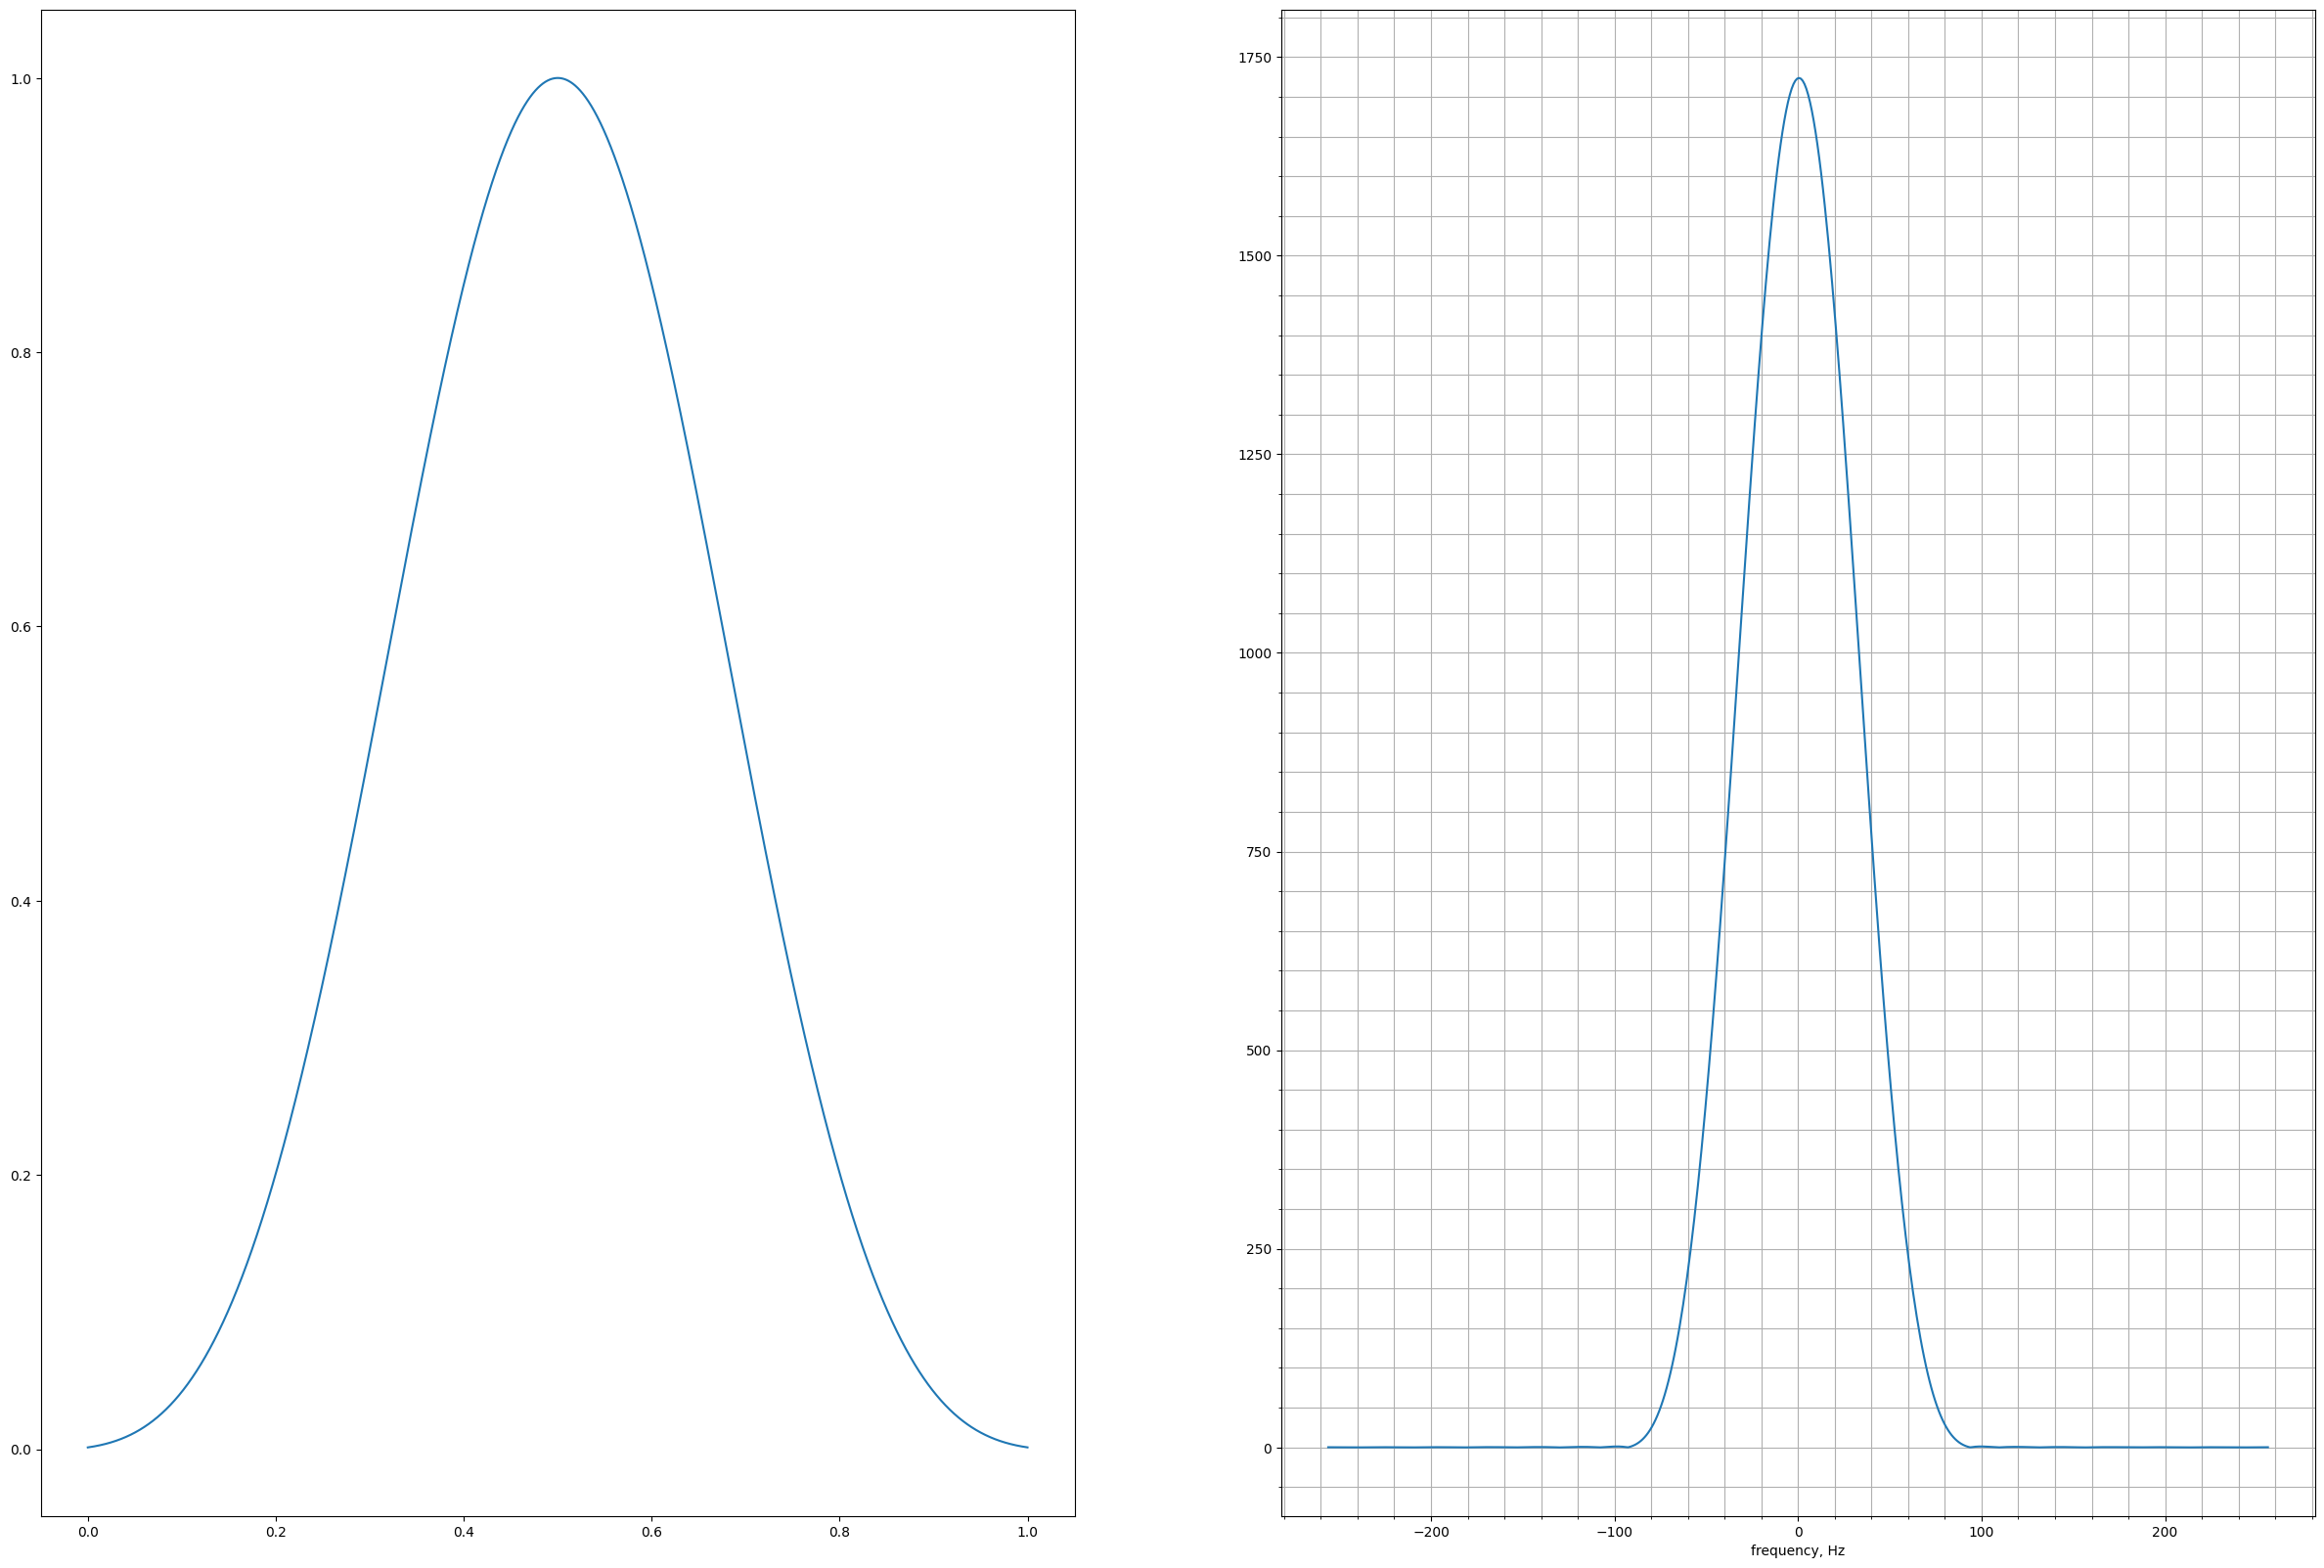

In [8]:


def kaiser (N, t, b = 0, a = 1):
    if t < N and t >= 0:
        M = N + 1
        return a * (np.kaiser (M,b))[t]
    else:
        return 0
drawFunc (4096, trapecia, 1, p1=3)
drawFunc(4096, cirle, 1)
drawFunc (4096, kaiser, 1, 0)
drawFunc (4096, kaiser, 1, 5)
drawFunc (4096, kaiser, 1, 6)
drawFunc (4096, kaiser, 1, 8.6)

## Задача 2.3. Окно Чебышева.
Получите окно Чебышева для четырех уровней боковых лепестков, которые получились в задаче 2.2. Сравните ширину главного лепестка на уровне половинной мощности с результатами предыдущих задач. 


/home/lev/.local/lib/python3.8/site-packages/scipy/signal/windows/_windows.py:1543: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


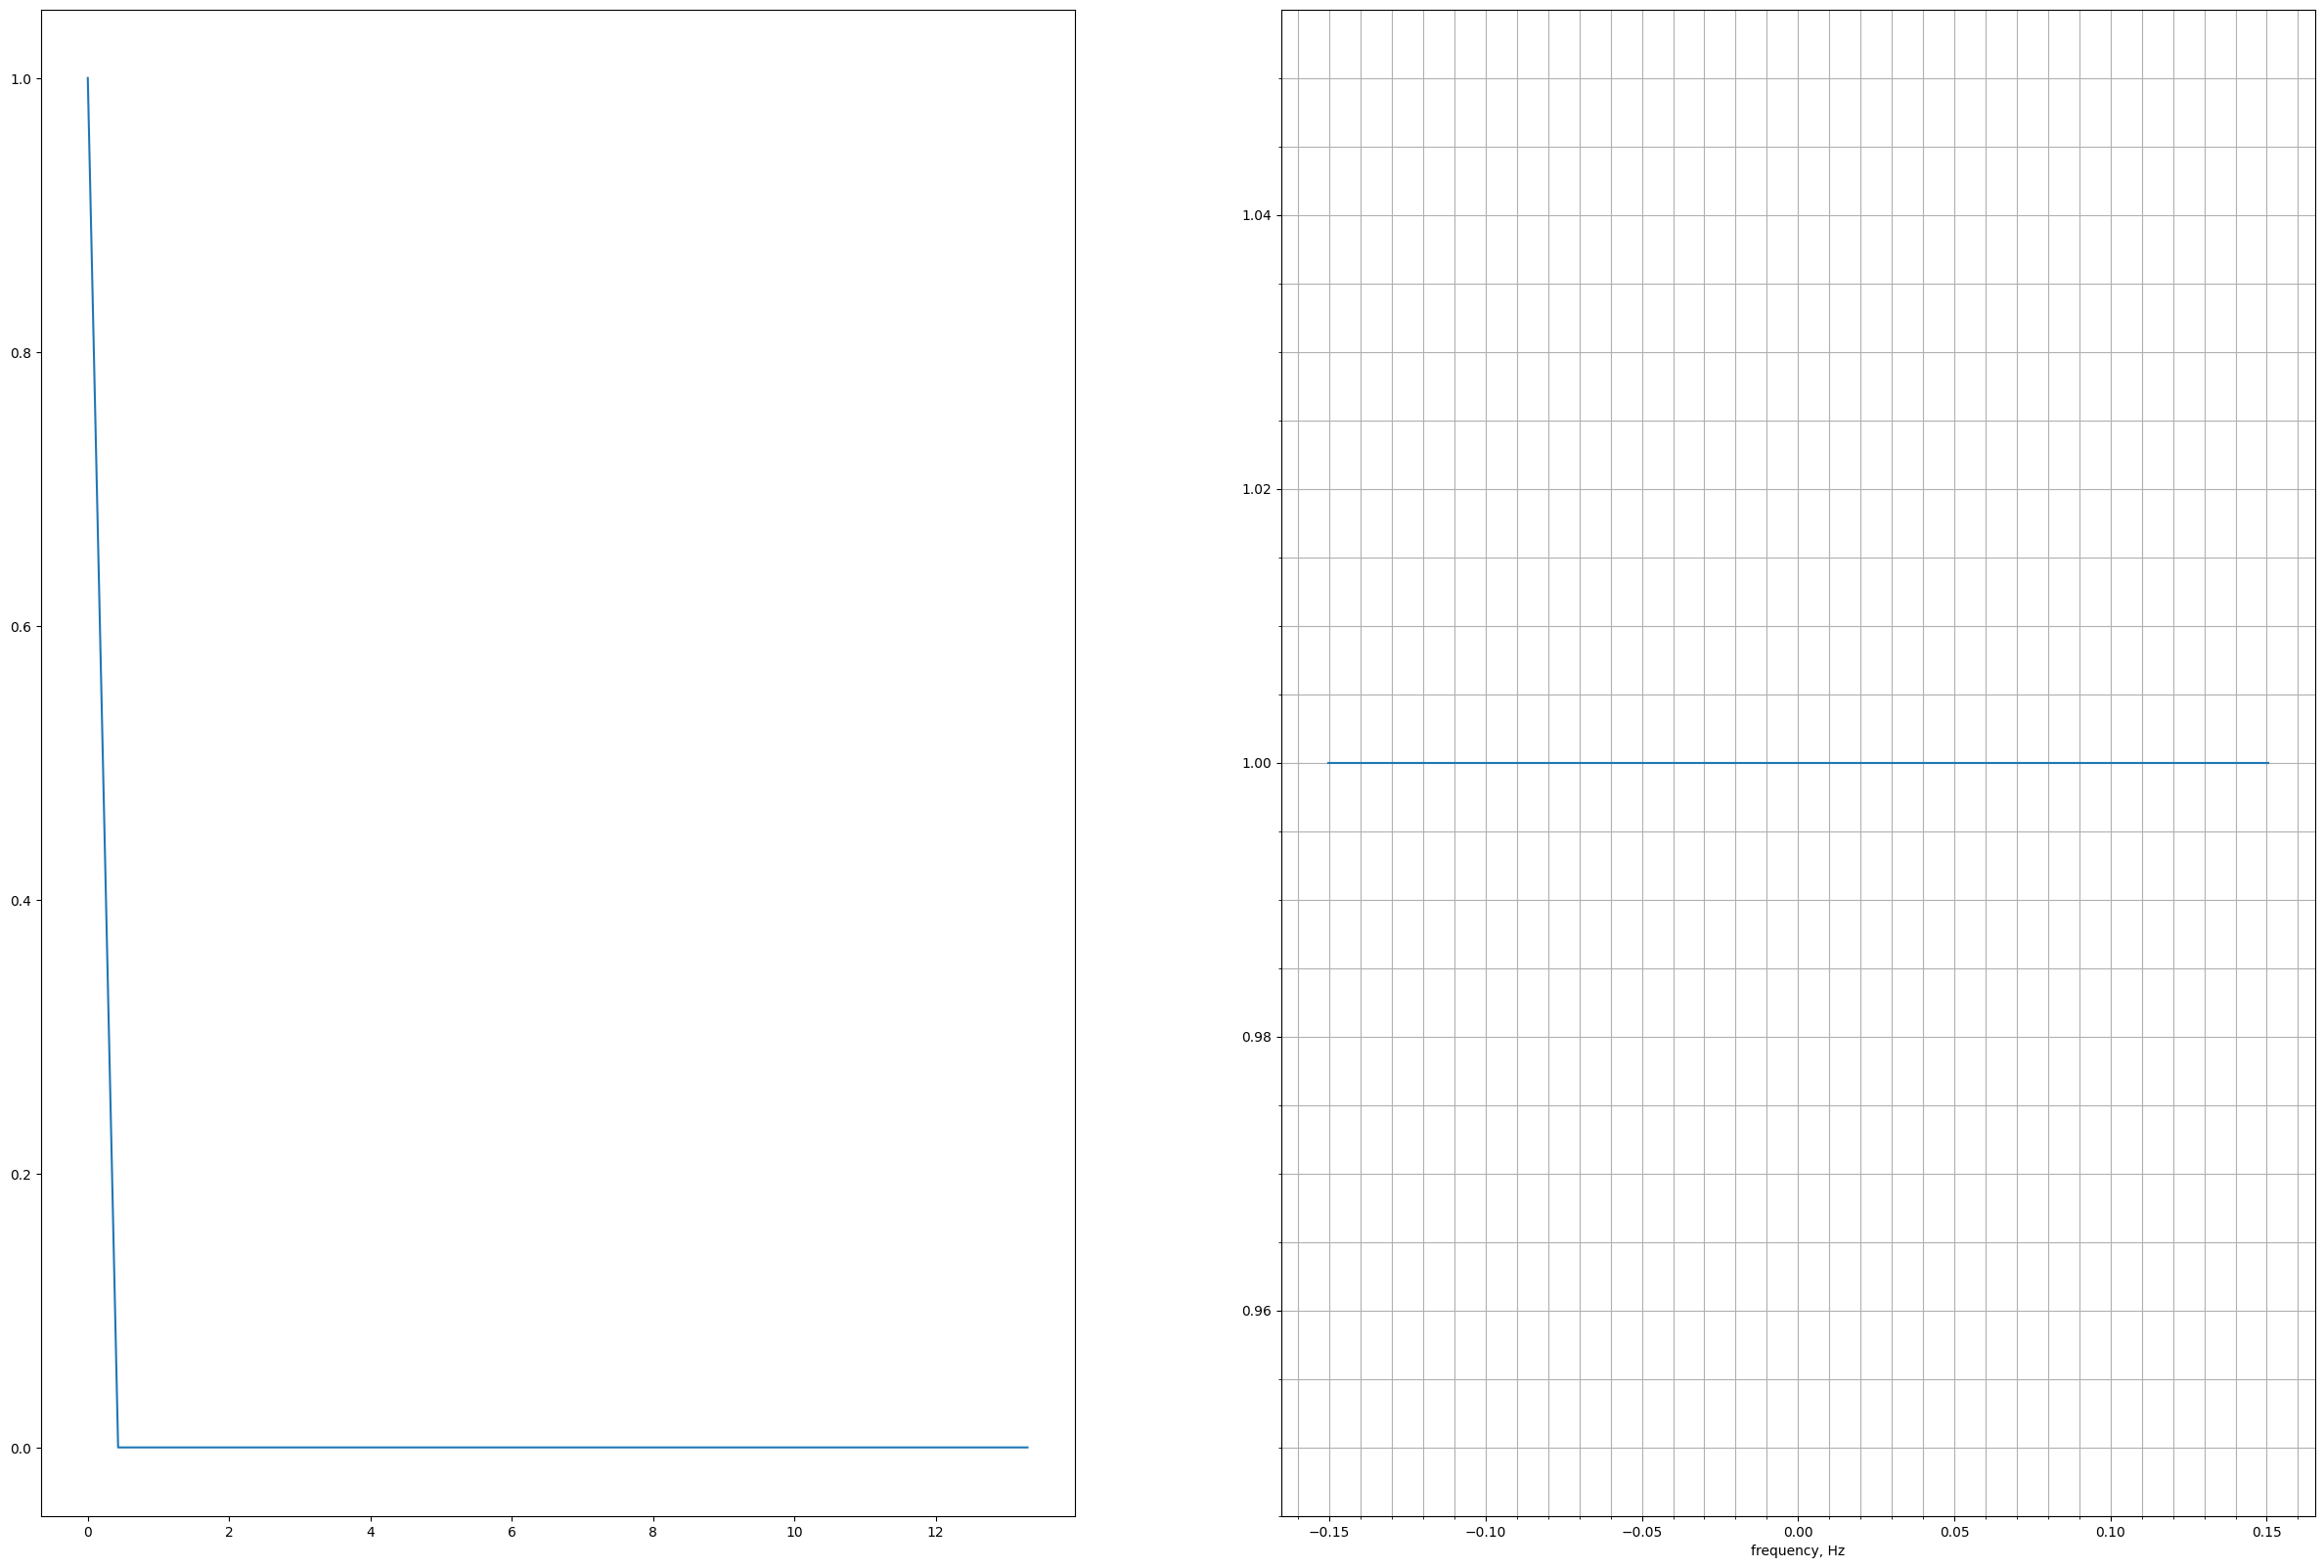

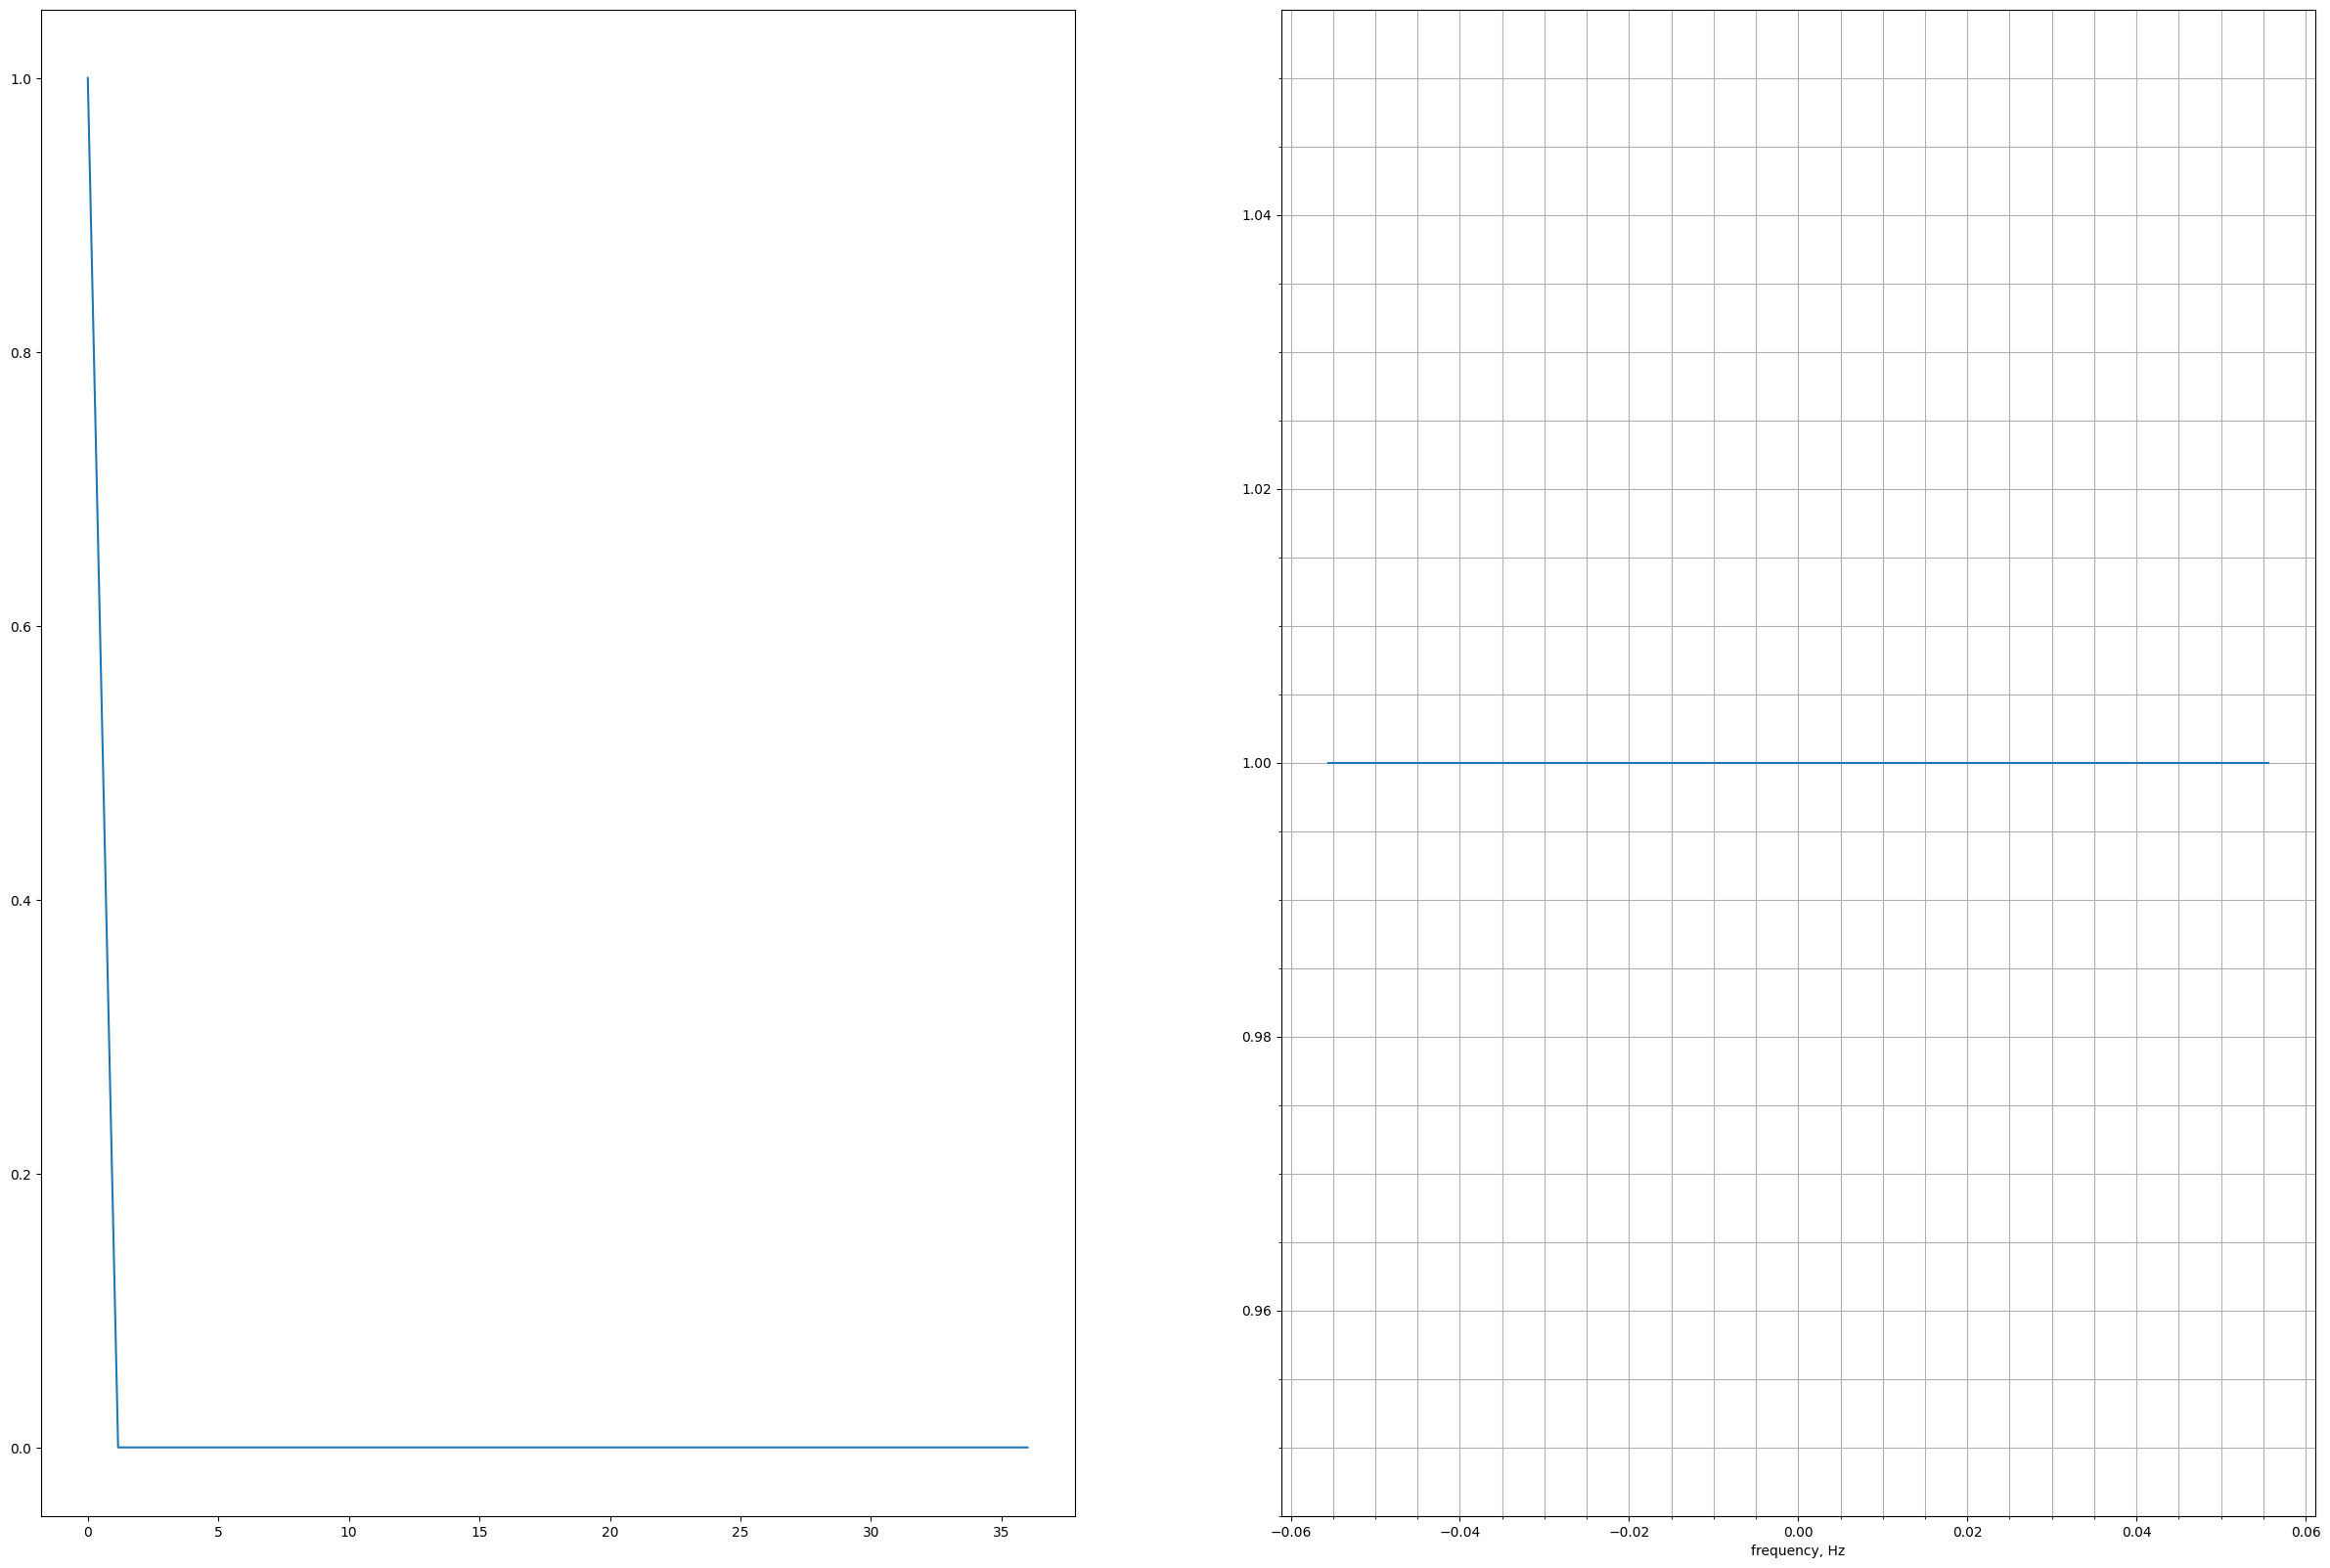

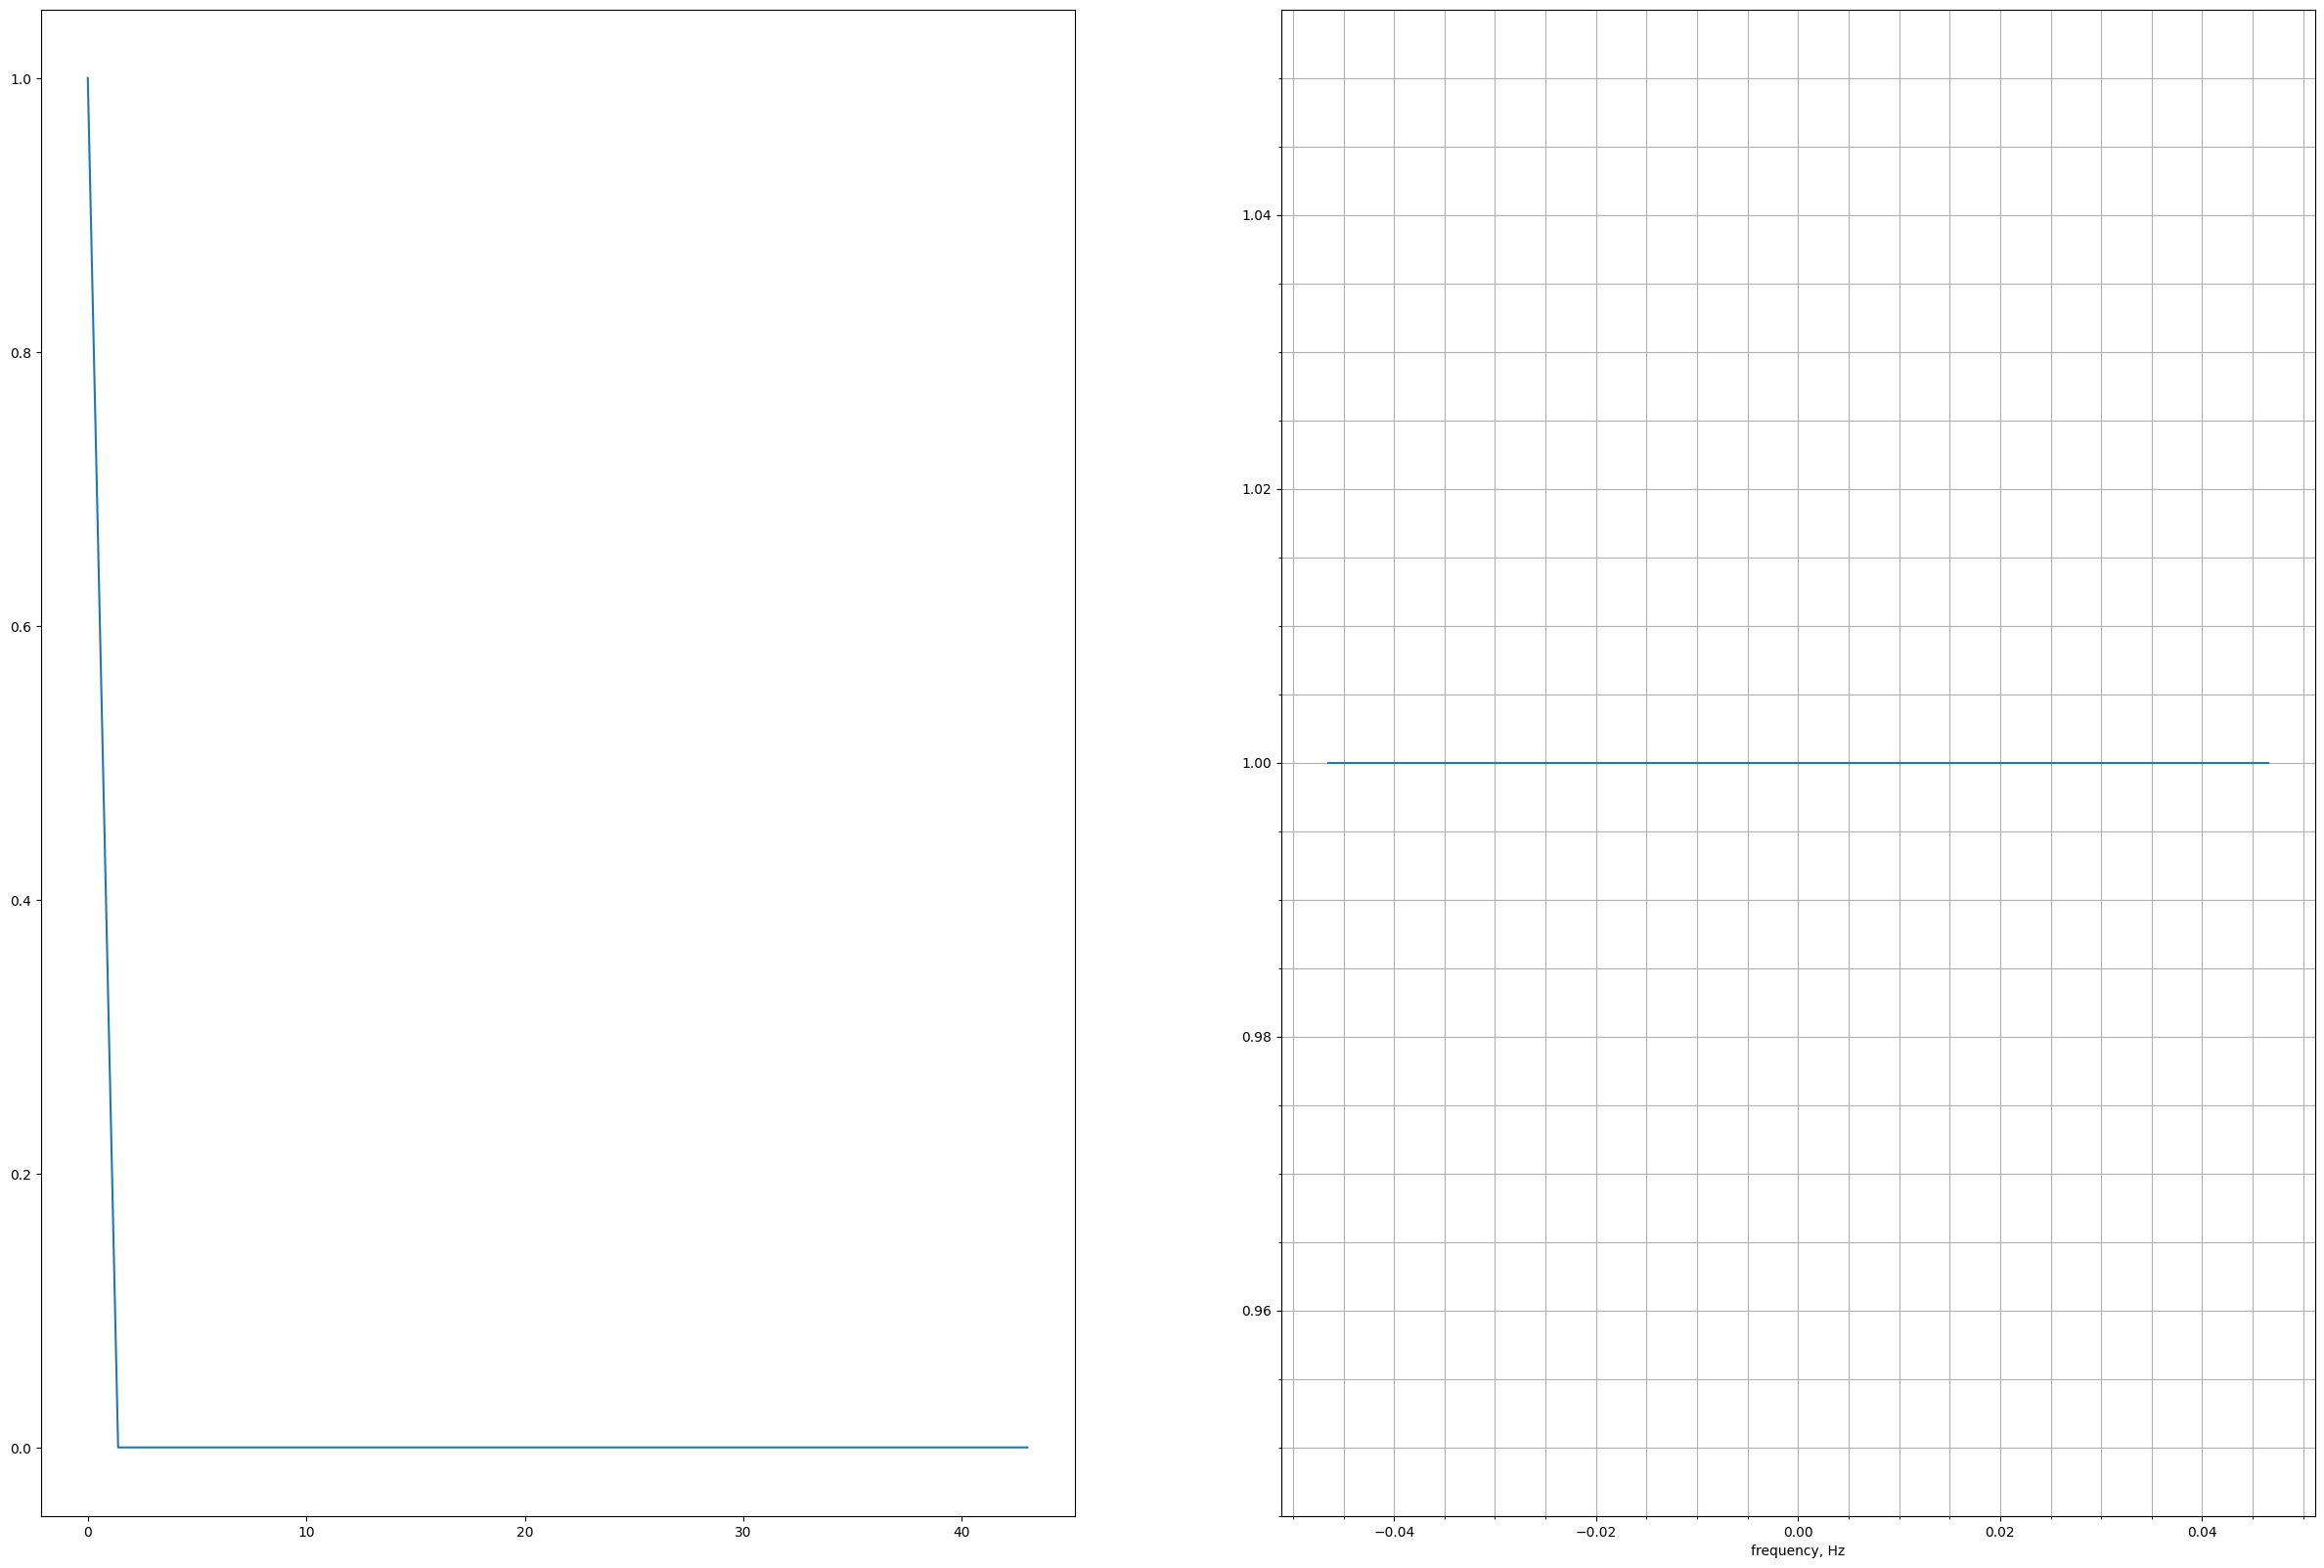

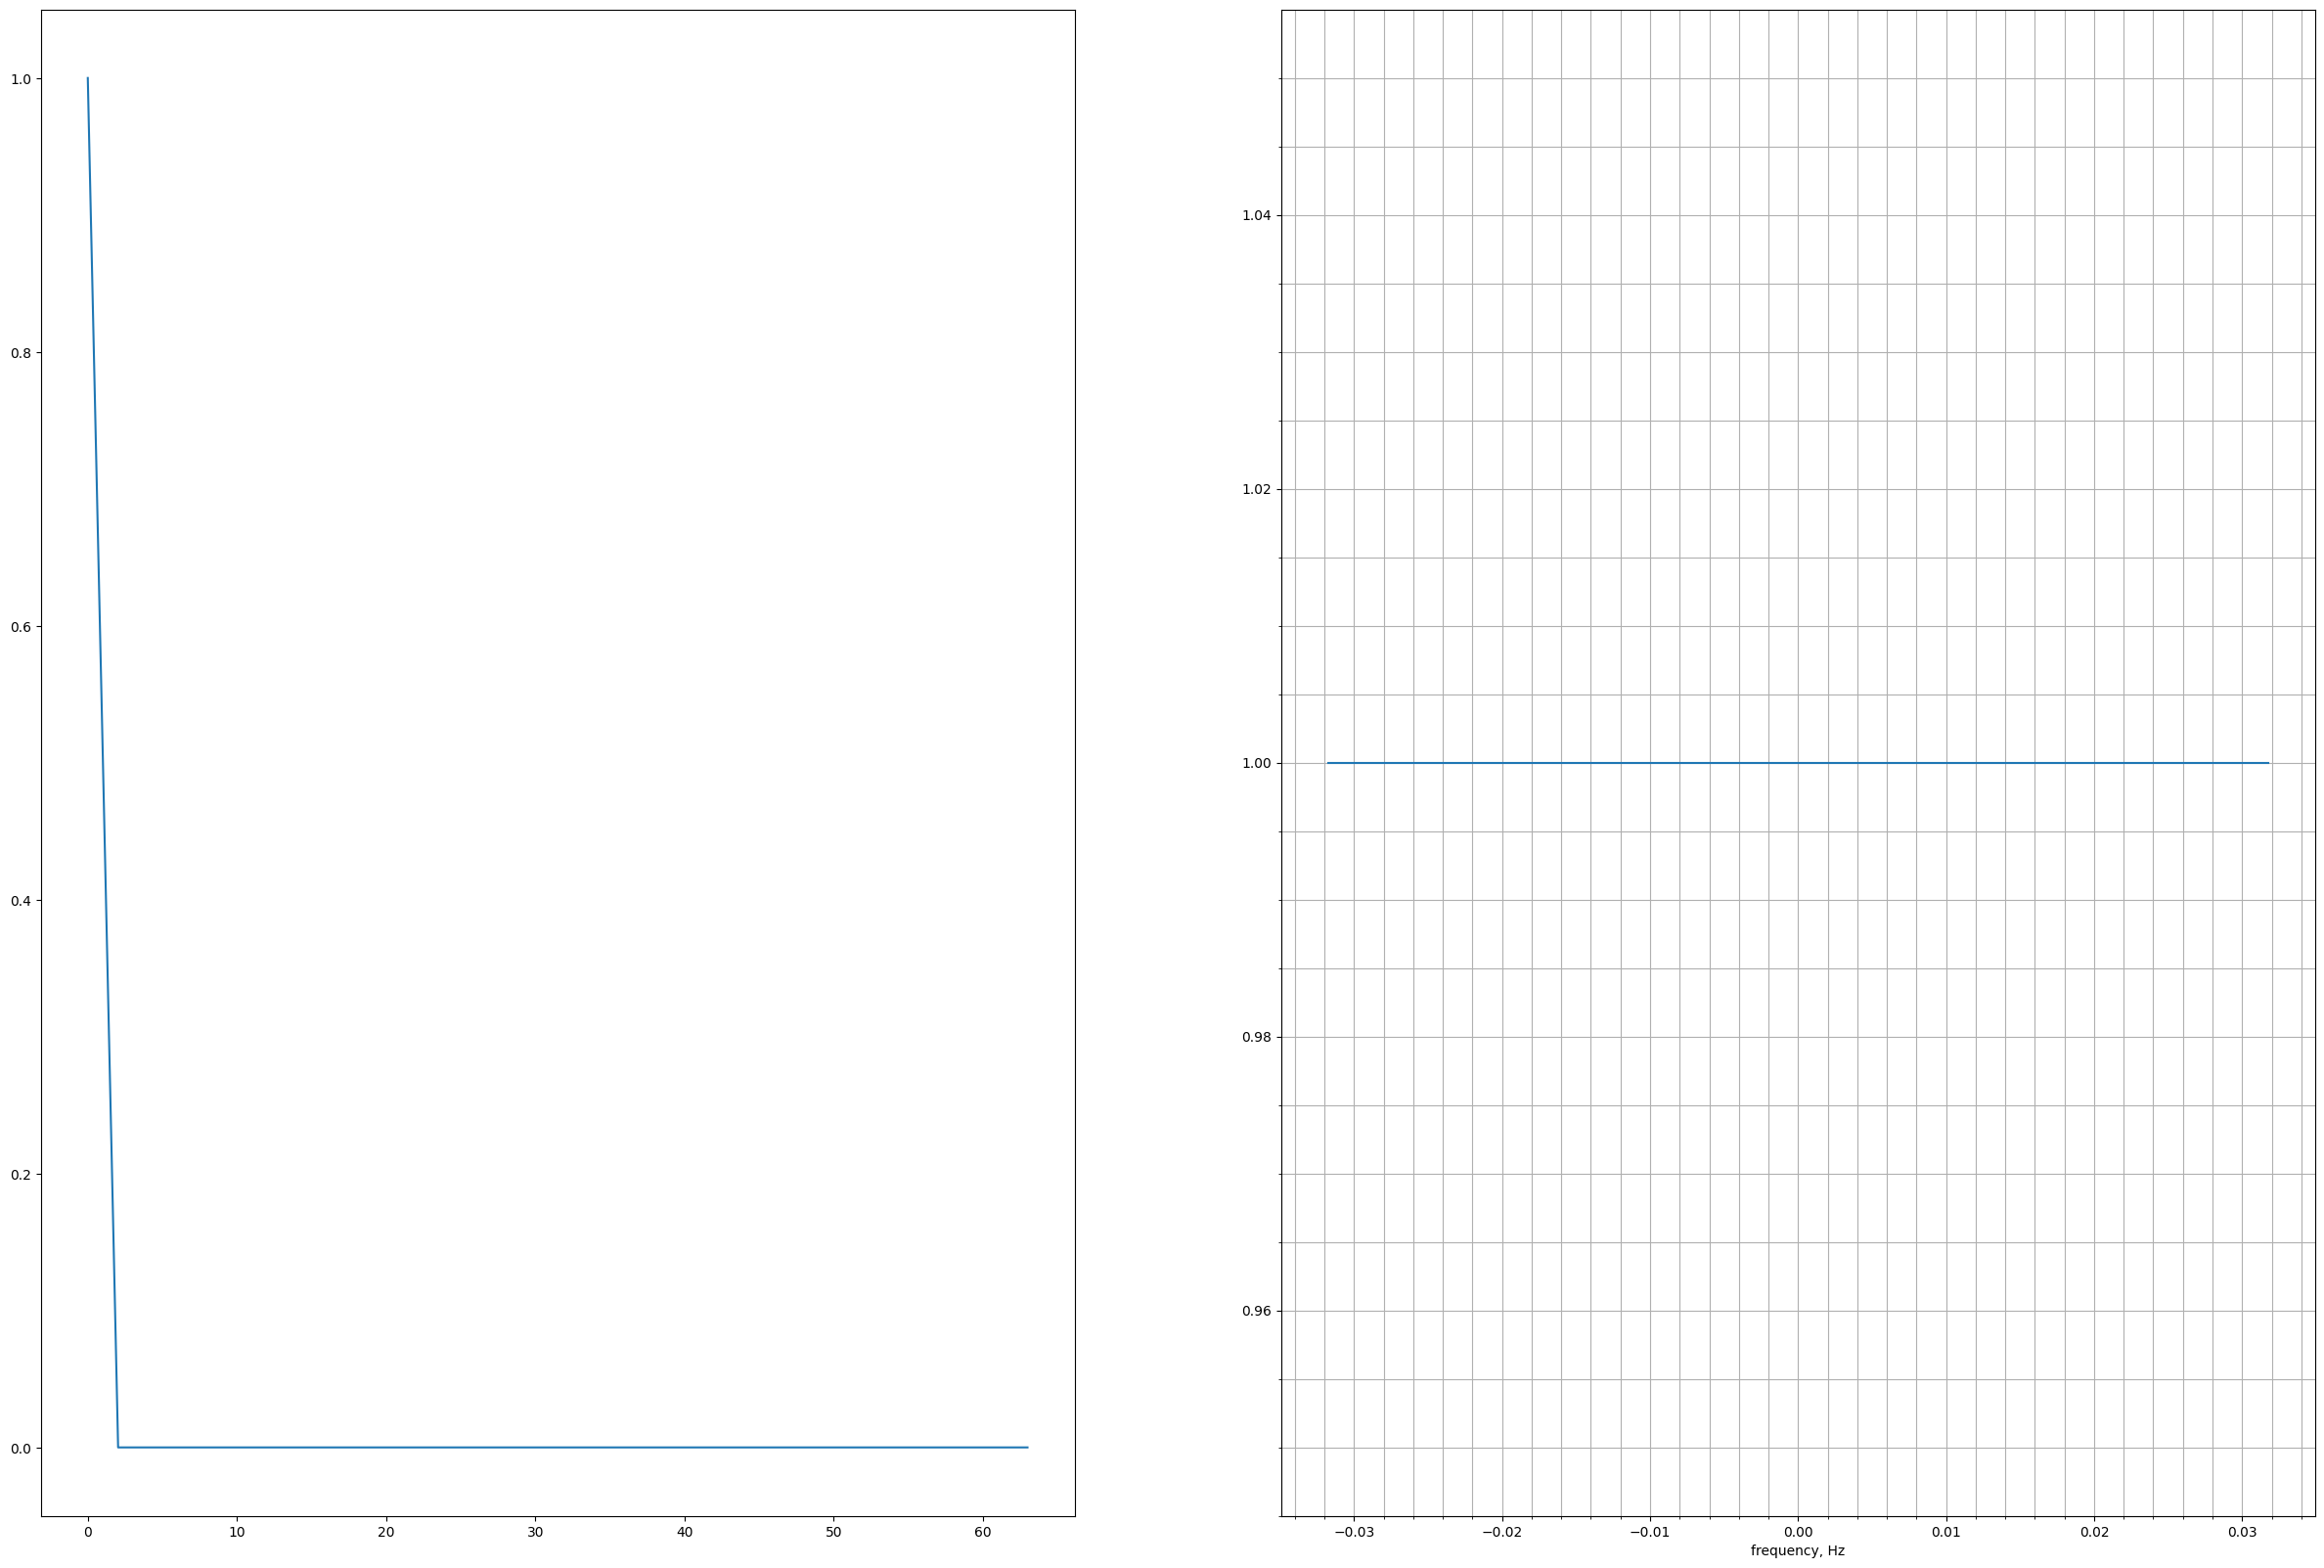

In [9]:
def cheb (N, t, dB = 0, a = 1):
    if t < N and t >= 0:
        M = N + 1
        return a * (scipy.signal.chebwin (M,dB))[t]
    else:
        return 0

drawFunc (32, cheb, 13.3)
drawFunc (32, cheb, 36)
drawFunc (32, cheb, 43)
drawFunc (32, cheb, 63)

## Задача 2.4. Различимость спектральных компонент.

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$n_0$|11 | 15 | 18 | 17 | 32 | 48 | 15 | 18 | 47 | 32 | 40 | 38 |
|$\beta_0$| 1.1| 1.5 | 1.2 | 1.5 | 1.1 | 1.3 | 1.1 | 1.4 | 1.5 | 1.3 | 1.2 | 1.1 |
|$\beta_1$| 5 | 5.5 | 6.2 | 5.7 | 6.1 | 4.9 | 5.1 | 5.7 | 6 | 5.8 | 5.7 | 5.5 |

Произведите спектральный анализ с помощью ДПФ размерности $M=2048$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{128} k\right)+ \cos\left(2\pi \dfrac{n_0+2}{128} k\right)$$
 со взвешиванием следующими оконными функциями длиной 128 отчетов:
 
 а) окном Кайзера с параметром $\beta=\beta_0.$,

 б) окном Кайзера с параметром $\beta=\beta_1.$
 
 в) окном Блэкмана.
 
Значения параметров $n_0$ и $\beta=\beta_1$ определите из таблицы. Ответьте на следующие вопросы.
 
1) Для каких оконных функций гармонические компоненты оказались различимы и почему?

2) Как влияет максимальный уровень боковых лепестков оконной функции на результат спектрального анализа? 


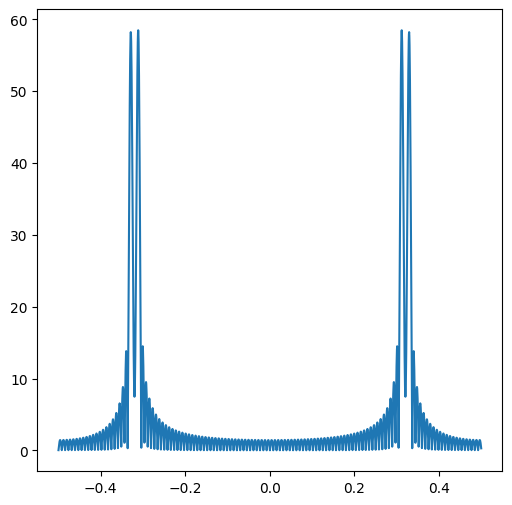

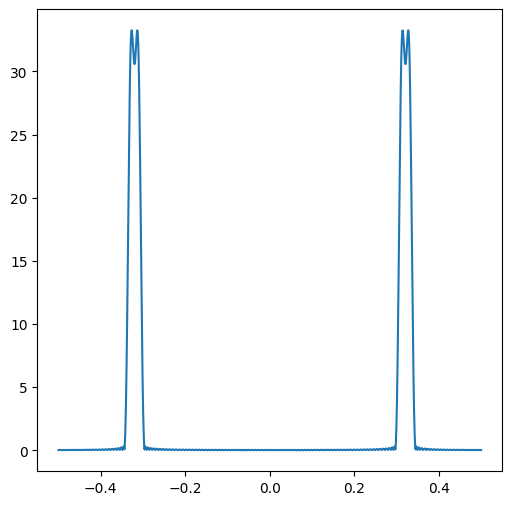

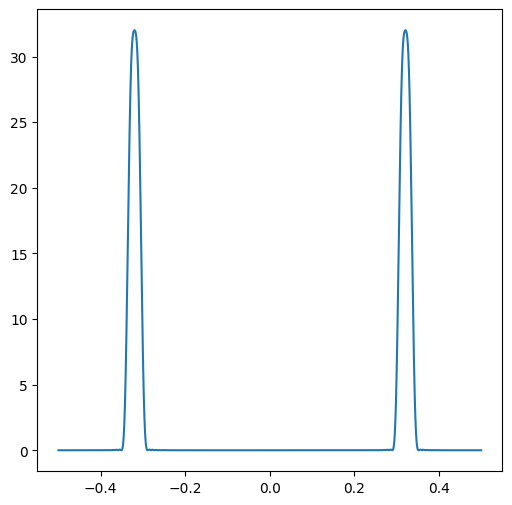

In [10]:
n0 = 40
b0 = 1.2
b1 = 5.7

karr = np.linspace (0, 2048, 2048, dtype=np.int32)
xarr = np.cos (2*np.pi*n0*karr/128) + np.cos (2*np.pi*(n0+2)*karr/128)

def spectr_of_windowed_signal(signal, p=None):
    y1arr = np.zeros (2048)
    for i in range (2048):
        y1arr[i] = xarr[i] * signal (128, i, p)
    y1arr = np.absolute(scipy.fft.fftshift( scipy.fft.fft (y1arr)))
    fig, ax = plt.subplots(1, 1, figsize = (6, 6))
    ax.plot (np.linspace (-0.5, 0.5, 2048), y1arr)
    
spectr_of_windowed_signal(kaiser, p=b0)
spectr_of_windowed_signal(kaiser, p=b1)
spectr_of_windowed_signal(blackman, p=1)

## Задача 2.5. Маскировка слабой гармоники боковыми лепестками окна.


| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | Бартлетта | Ханна | Хэмминга | Ханна | Бартлетта | Хэмминга |
| $m_2$ |    -2     |     2    |   -2    |     2    |   -2    |     2    |
| $m_3$ |     4     |     6    |    3    |     4    |    5    |     7    |


| Варианты: |       7      |     8     |         9        |      10     |        11       |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | Хэмминга | Ханна | Бартлетта | Ханна | Хэмминга | Бартлетта |
| $m_2$ |      2     |   -2    |     2    |   -2    |     2    |   -2    |
| $m_3$ |      7     |    3    |    -3    |   -4    |     5    |    4    |

Сгенерировать последовательность отсчетов гармонического сигнала $x[k]$ длительностью $N=64$, которая может быть описана следующей формулой:
$$x[k]=a_1 \sin\left(2\pi k \frac{n}{N}\right) + a_2 \cos\left(2\pi k \frac{n+m_2}{N}\right) - a_3\sin\left(2\pi k \frac{n+m_3}{N}\right),$$
где $a_1 = n = n_\text{v}+10$ ($n_\text{v}$ — номер вашего варианта), $a_2 = \dfrac{a_1}{6}$, $a_3 = \dfrac{a_1}{2}$, $m_2$  и  $m_3$  значения из таблицы, соответствующие вашему варианту.

* Построить ДВПФ $x[k]$, применив прямоугольное окно. Сколько гармонических компонент можно выделить?

* Построить ДВПФ $x[k]$, применив окно Блэкмана. Какие гармонические компоненты наблюдаются теперь?

* Построить ДВПФ $x[k]$, используя окно $w_1[k]$ из вашего варианта. Получилось ли пронаблюдать все гармонические компоненты?

* Подобрать коэффициенты для окон Чебышева и Кайзера так, чтобы возможно было наблюдать все гармонические компоненты. Построить соответствующие графики.**

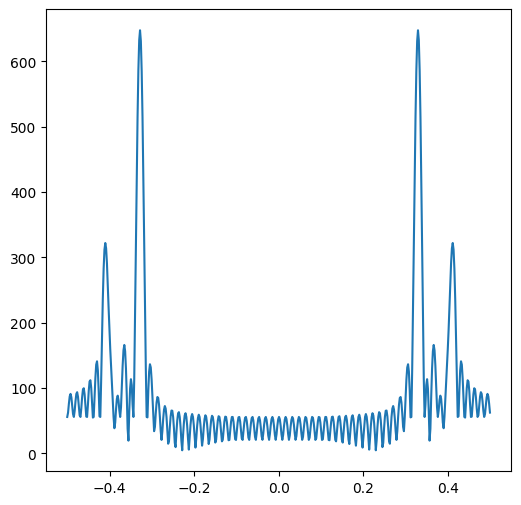

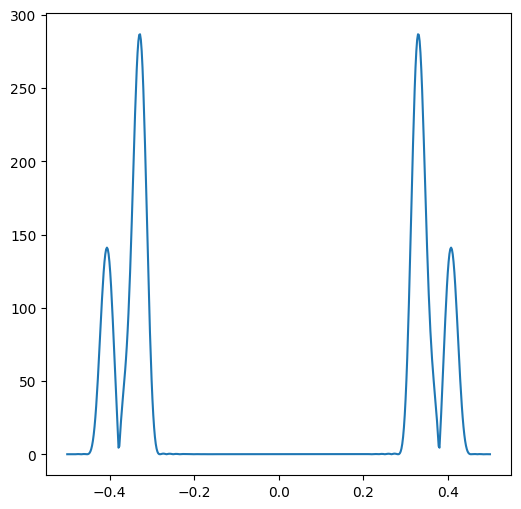

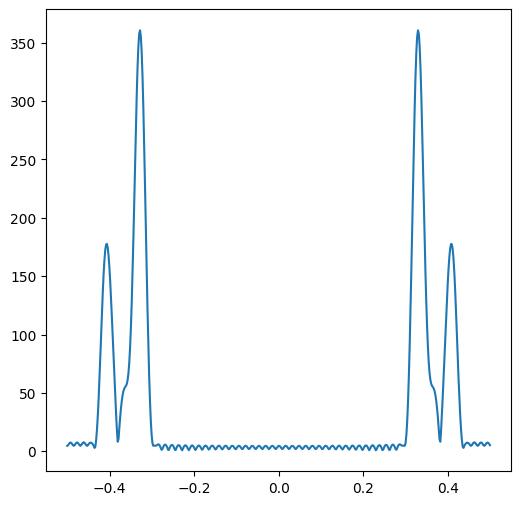

In [11]:
m2 = 2
m3 = 5
n = 21
a2 = n/6
a3 = n/2
N = 64

karr = np.linspace(0, N, N, dtype=np.int32)
xarr = n* np.cos(2*np.pi*n*karr/N) + a2*np.cos(2*np.pi*(n+m2)*karr/N)  + a3*np.cos(2*np.pi*(n+m3)*karr/N)
xarr = np.append(xarr, np.zeros(7*N))

y1arr = np.zeros(8*N)
for i in range(8*N):
    y1arr[i] = xarr[i] * boxcar(N, i)
y1arr = np.absolute(scipy.fft.fftshift(scipy.fft.fft (y1arr)))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot(np.linspace(-0.5, 0.5, 8*N), y1arr)

y2arr = np.zeros(8*N)
for i in range(8*N):
    y2arr[i] = xarr[i] * blackman(N, i)
y2arr = np.absolute(scipy.fft.fftshift(scipy.fft.fft (y2arr)))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot(np.linspace(-0.5, 0.5, 8*N), y2arr)

y3arr = np.zeros(8*N)
for i in range(8*N):
    y3arr[i] = xarr[i] * hamming(N, i)
y3arr = np.absolute(scipy.fft.fftshift(scipy.fft.fft (y3arr)))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot(np.linspace(-0.5, 0.5, 8*N), y3arr)



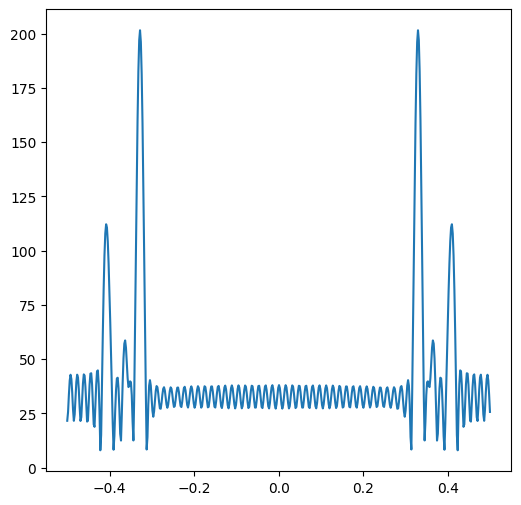

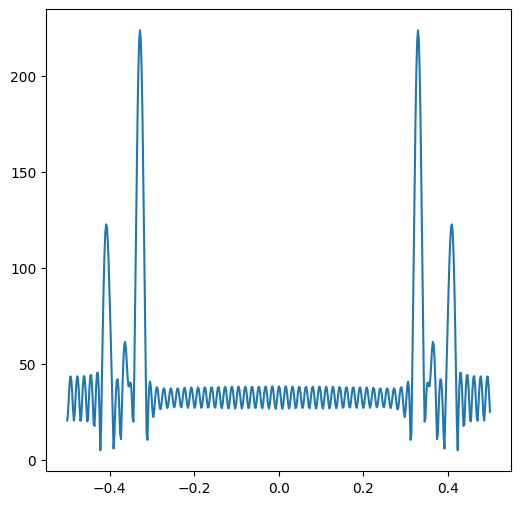

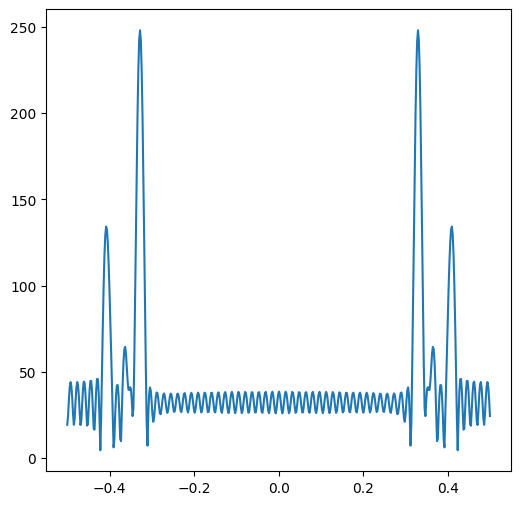

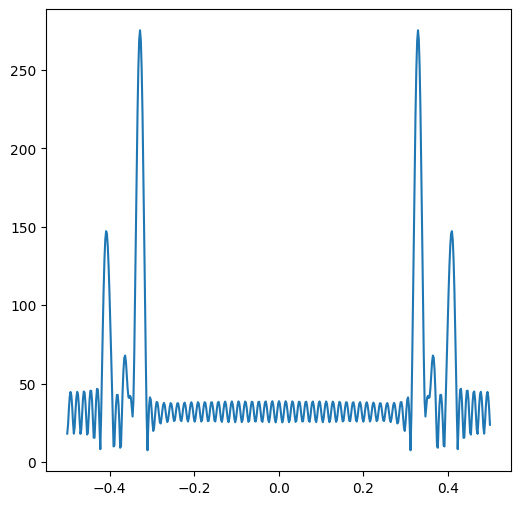

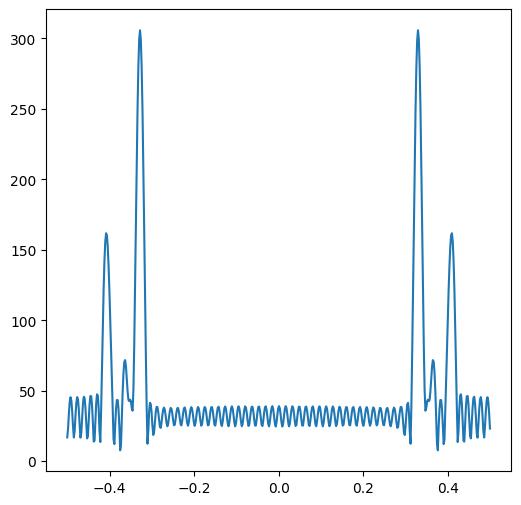

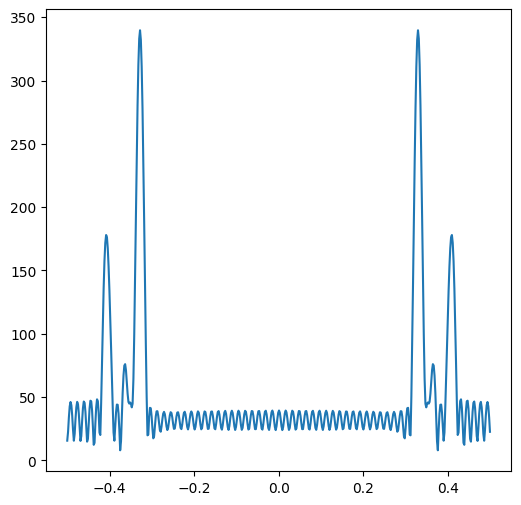

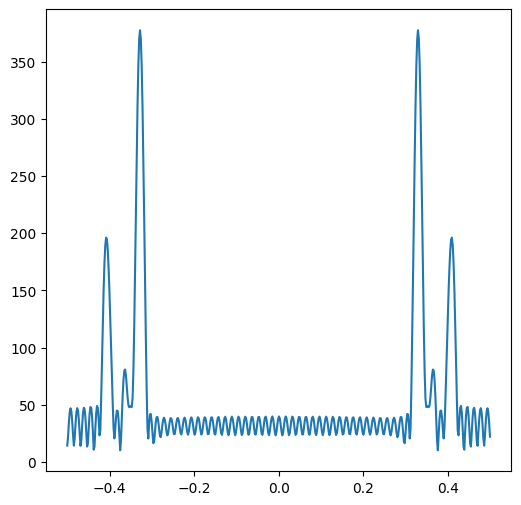

In [12]:
for param in range(20, 27):
    y3arr = np.zeros(8*N)
    for i in range(8*N):
        y3arr[i] = xarr[i] * cheb(N, i, param)
    y3arr = np.absolute(scipy.fft.fftshift(scipy.fft.fft (y3arr)))
    fig, ax = plt.subplots(1, 1, figsize = (6, 6))
    ax.plot(np.linspace(-0.5, 0.5, 8*N), y3arr)


## Задача 2.6. Амплитудная модуляция спектра.

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$n_0$|11,5 | 15,5 | 18,5 | 17,5 | 32,5 | 48,5 | 15,5 | 18,5 | 47,5 | 32,5 | 40,5 | 38,5 |

Произведите спектральный анализ с помощью ДПФ размерности $M=128$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{128} k\right)$$
 со взвешиванием следующими оконными функциями длиной 128 отчетов:
 
 а) прямоугольным окном (`boxcar`),

 б) окном с плоской вершиной (`flattop`).
 
 
Значение параметра $n_0$ определите из таблицы. Отнормируйте ДПФ на значение АЧХ оконной функции на нулевой частоте ($W(0)=\sum_{k=0}^{N-1} w[k]$). Для двух окон сравните амплитуду гармоники с модулем ближайших к ней отсчетов ДПФ.

<StemContainer object of 3 artists>

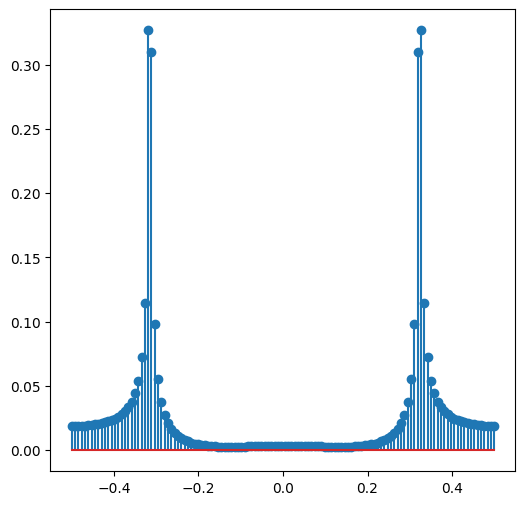

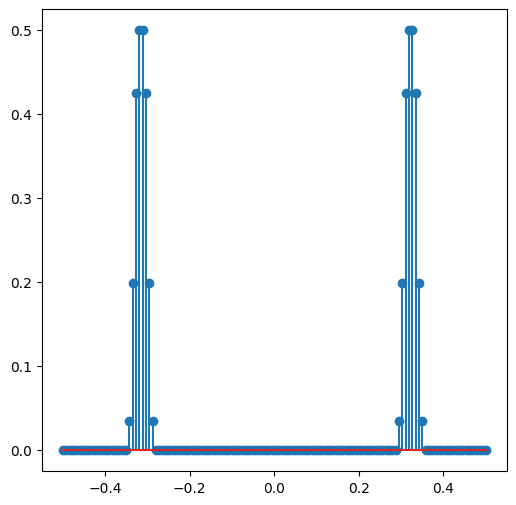

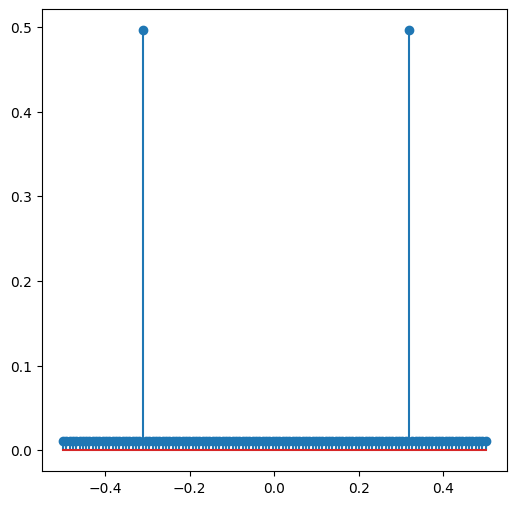

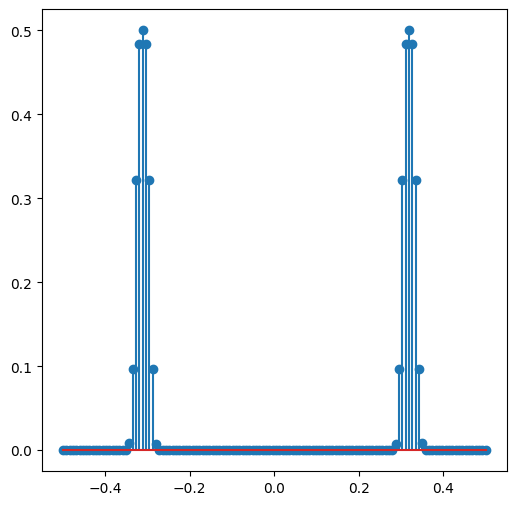

In [13]:
N = 128
n0 = 40.5
n1 = 40

karr = np.linspace(0, N, N, dtype=np.int32)
xarr = np.cos(2*np.pi*n0*karr/N)
xarr_placed = np.cos(2*np.pi*n1*karr/N)
y1arr = np.zeros (N)
s = 0
for i in range (N):
    y1arr[i] = xarr[i] * boxcar (N, i)
    s += boxcar (N, i)
y1arr = np.absolute(scipy.fft.fftshift(scipy.fft.fft (y1arr))) / s
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.stem(np.linspace(-0.5, 0.5, N), y1arr)

y2arr = np.zeros(N)
s = 0
for i in range (N):
    y2arr[i] = xarr[i] * flattop (N, i)
    s += flattop(N, i)
y2arr = np.absolute(scipy.fft.fftshift(scipy.fft.fft (y2arr))) / s
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.stem(np.linspace(-0.5, 0.5, N), y2arr)

y1arr = np.zeros (N)
s = 0
for i in range (N):
    y1arr[i] = xarr_placed[i] * boxcar (N, i)
    s += boxcar (N, i)
y1arr = np.absolute(scipy.fft.fftshift(scipy.fft.fft (y1arr))) / s
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.stem(np.linspace(-0.5, 0.5, N), y1arr)

y2arr = np.zeros(N)
s = 0
for i in range (N):
    y2arr[i] = xarr_placed[i] * flattop (N, i)
    s += flattop(N, i)
y2arr = np.absolute(scipy.fft.fftshift(scipy.fft.fft (y2arr))) / s
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.stem(np.linspace(-0.5, 0.5, N), y2arr)

# Занятие 3. Кратковременное дискретное преобразование Фурье (STFT) 

## Задача 3.1. Спектрограмма аудиофайла.  

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** |'clarinet_minor.wav' | 'clarinet_major32.wav'| 'major_scale_flute1.wav' | 'major_scale_flute2.wav'|'major_scale_flute3.wav' | 'major_scale_flute4.wav'|

| Варианты: |       7      |     8     |         9        |      10     |        11        |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** |'major_scale_flute5.wav'|'major_scale_piano2.wav'|'major_scale_piano3.wav'|'single_notes.wav'|'violin_natural_minor.wav'|'violin_natural_minor_up.wav'|


Вычислите кратковременное дискретное преобразование Фурье (STFT) для отсчетов сигнала, содержащихся в аудиофайле Вашего варианта. Изобразите спектрограмму сигнала. Длину окна (размер кадра), тип оконной функции, число точек в перекрытии, масштабы осей и размерность ДПФ самостоятельно подберите так, чтобы можно было выделить гармонические компоненты в сигнале. Ответьте на следующие вопросы.

1) Какие выводы можно сделать о составе данного сигнала по спектрограмме?  

2) Чему равен размер кадра в секундах и как это соотносится с графиком?

3) Какое разрешение по времени и какое по частоте у данной спектрограммы? 

4) Какие изменения можно наблюдать в спектрограмме, если изменяется:

* а) тип оконной функции,

* б) длина окна,

* в) размерность ДПФ (за счет дополнения нулевыми отсчетами)?


windows size (seconds): 0.18575963718820862
time resolution (seconds): 0.13931972789115646
frequency resolution (Hz): 2.691650390625


/tmp/ipykernel_303/1311436522.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = scipy.io.wavfile.read ("/home/lev/digital_signal_processing/data/vibraphone-loop-1.wav")


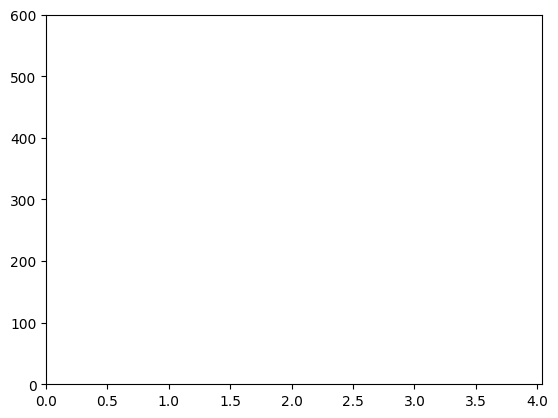

In [14]:
samplerate, data = scipy.io.wavfile.read ("/home/lev/digital_signal_processing/data/vibraphone-loop-1.wav")

M = 8192
R = 6144
window = hamming
N = 16384
data = data[0:data.shape[0]//R * R, 0]

print ('windows size (seconds):', M/samplerate)
print ('time resolution (seconds):', R/samplerate)
print ('frequency resolution (Hz):', samplerate/N)

spec = np.absolute(scipy.fft.fftshift (scipy.fft.fft (np.append (data[0:M], np.zeros (N-M)))))
freqtable = np.ndarray ((data.shape[0]//R + 1, N))
wind = np.zeros (N)
for i in range(N):
    wind[i] = window (M, i)
for i in range (0, data.shape[0], R):
    freqtable[i//R, :] = np.absolute(scipy.fft.fftshift (scipy.fft.fft (wind[:] * np.append (data[i:i+M], np.zeros (N-data[i:i+M].shape[0])))))
fig, ax = plt.subplots(1, 1)

freqtable = freqtable.transpose ()

ax.set_ylim (0, 600)

ax.pcolormesh(np.arange (0, data.shape[0] + R, R) / samplerate, 
              np.arange (-0.5, 0.5, 1/N) * samplerate, 
              freqtable[:-1, :-1], vmin=np.max(freqtable)/5000, vmax=np.max(freqtable)/25, shading='flat')

## Задача 3.2. Спектрограмма ЛЧМ сигнала. 

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$f_0$, Гц | 170| 80 | 90 | 75 | 120 | 130 | 85 | 95 | 70 | 65 | 110 | 105 |
|$f_1$, Гц | 800 | 900 | 850 | 870 | 820 | 875 | 780 | 810 | 790 | 825 | 830 | 840 |

Постройте спектрограмму c окном Блэкмана для ЛЧМ-сигнала длительностью $T=2$ секундам, мгновенная частота которого изменяется от $f_0$ до $f_1$, частота дискретизации $f_s=2000$ Гц. Начальный размер кадра (`nperseg`) выберите $H=512$ отсчетов. Пронаблюдайте, как изменяется спектрограмма при изменении следующих параметров:
* тип оконной функции (`window`),
* длина кадра (`nperseg`),
* размерность ДПФ (`nfft`).

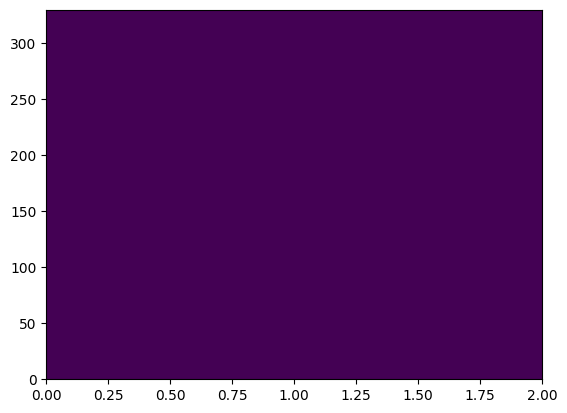

In [15]:
window = hamming
nperseg = 512
nfft = 1024
samplerate = 2000

f0 = 110
f1 = 830
tarr = np.arange (0, 3, 1/2000)
data = np.sin ((f0 + (f1 - f0) / 2 * tarr) * tarr)

M = nperseg
R = nperseg // 4 * 3
N = nfft

data = data[0:data.shape[0]//R * R]

spec = np.absolute(scipy.fft.fftshift (scipy.fft.fft (np.append (data[0:M], np.zeros (N-M)))))
freqtable = np.ndarray ((data.shape[0]//R + 1, N))
wind = np.zeros (N)
for i in range(N):
    wind[i] = window (M, i)
for i in range (0, data.shape[0], R):
    freqtable[i//R, :] = np.absolute(scipy.fft.fftshift(scipy.fft.fft (wind[:] * np.append (data[i:i+M], np.zeros (N-data[i:i+M].shape[0])))))
fig, ax = plt.subplots(1, 1)

freqtable = freqtable.transpose ()

ax.set_ylim (0, 330)
ax.set_xlim (0, 2)

ax.pcolormesh(np.arange (0, data.shape[0] + R, R) / samplerate, 
              np.arange (-0.5, 0.5, 1/N) * samplerate, 
              freqtable[:-1, :-1], vmin=np.max(freqtable)/5000, vmax=np.max(freqtable)/25, shading='flat')